In [48]:
import numpy as np
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt
from keras.models import load_model

In [3]:
SET50 = ['ADVANC', 'AOT', 'BANPU', 'BBL', 'BCP', 'BDMS',
        'BEM', 'BH', 'BJC', 'BTS', 'CENTEL', 'CPALL', 'CPF',
        'CPN', 'DTAC', 'EGCO', 'HMPRO', 'INTUCH', 
        'IRPC', 'KBANK', 'KCE', 'KKP', 'KTB', 'LH', 'MINT', 
        'PTT', 'PTTEP', 'ROBINS', 'SCB', 'SCC', 
        'TCAP', 'TISCO', 'TMB', 'TOP', 'TRUE', 'TU']

In [45]:
def load_stock_data(symbol, year_start, year_end):
    stock_data = []
    with open('../Data set/FIXED_SET50/' + symbol + '.BK.csv', 'r') as csv_file:
        file_data = csv.reader(csv_file, delimiter=',')
        file_data = list(file_data)[1:]
        temp_value = 0
        for row in file_data:
            if row[1] is '':
                continue
            elif int(row[0][0:4]) >= year_start and int(row[0][0:4]) <= year_end:
                temp = float(row[1])
                if temp_value != 0:
                    unrealize = (temp - temp_value)/ temp_value
                else:
                    unrealize = 0
                unrealize = ["{0:.2f}".format(unrealize)]
                stock_data.append(unrealize)
                temp_value = temp
                
    return stock_data

def findNewXTest(x_test, predict):
    for (index, element) in enumerate(x_test[0]):
        for i in range(len(element)):
            if i == 0:
                continue
            elif i < 29:
                element[i - 1] = element[i]
            else:
                element[i - 1] = element[i]
                element[i] = "{0:.2f}".format(predict[index])
    return x_test

def plot_graph(array1, array4):
    plt.figure(figsize=(20,10))
    x_axis = [i for i in range(len(array1))]
    plt.plot(x_axis, array1, 'g')
    plt.plot(x_axis, array4, 'y')

    plt.show()
    
def get_data_from_nparray(nparray, index):
    return_data = [i[index] for i in nparray]
    return return_data

In [5]:
stock_datas = [ load_stock_data(x, 2008, 2017) for x in SET50 ]

min_count = len(stock_datas[0])

In [6]:
rounds = min_count - 30
train_index = int(rounds * 0.75)
validate_index = train_index + int(rounds * 0.05)

In [9]:
data = []
count = 0
index = 0
while index < rounds:
    temp = [i[index : index + 30] for i in stock_datas]
    data.append(temp)
    index += 1
    
x = np.asarray(data)
x_train = x[0: train_index].astype('float32')
x_validate = x[train_index: validate_index].astype('float32')
x_test = x[validate_index: validate_index + 1].astype('float32')

print(x_train.shape, x_validate.shape, x_test.shape)

(1811, 36, 30, 1) (120, 36, 30, 1) (1, 36, 30, 1)


In [8]:
target = []
index = 0
while index < rounds:
    temp = [stock_datas[i][index + 30][0] for i in range(len(stock_datas))]
    target.append(temp)
    index += 1
    
y = np.asarray(target)
y_train = y[0: train_index].astype('float32')
y_validate = y[train_index: validate_index].astype('float32')
y_test = y[validate_index: rounds].astype('float32')

print(y_train.shape, y_validate.shape, y_test.shape)

(1811, 36) (120, 36) (484, 36)


In [15]:
model = load_model('cnn1fc3.h5')

predicts = []
test_data = x_test.copy()
for (index, element) in enumerate(y_test):
    predict = model.predict(test_data, verbose = 0)
    predicts.append(predict[0])
    test_data = findNewXTest(test_data, predict[0])

ADVANC


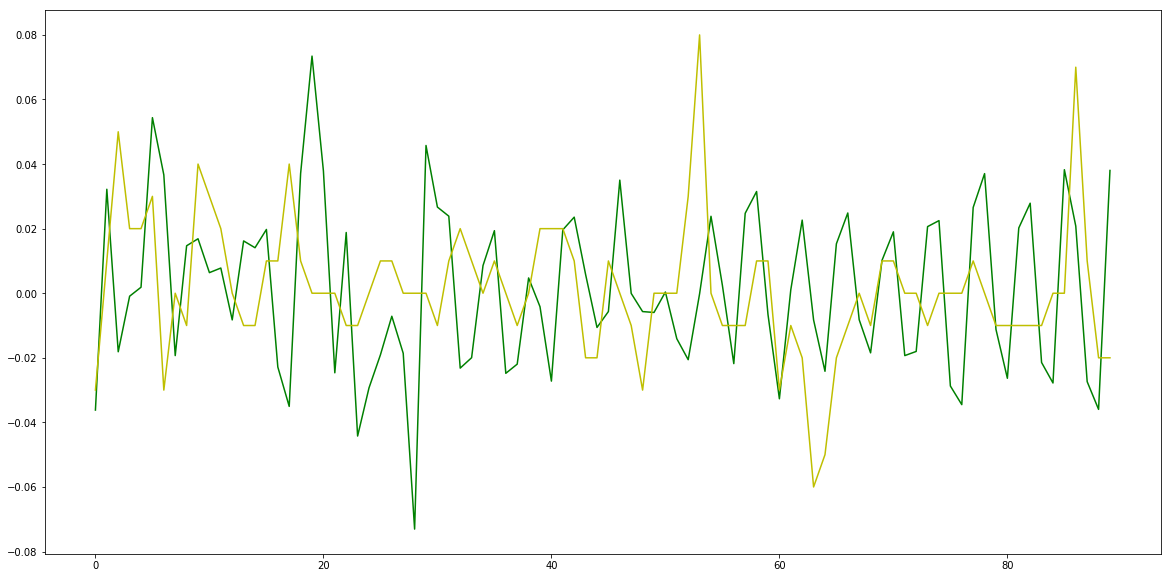

AOT


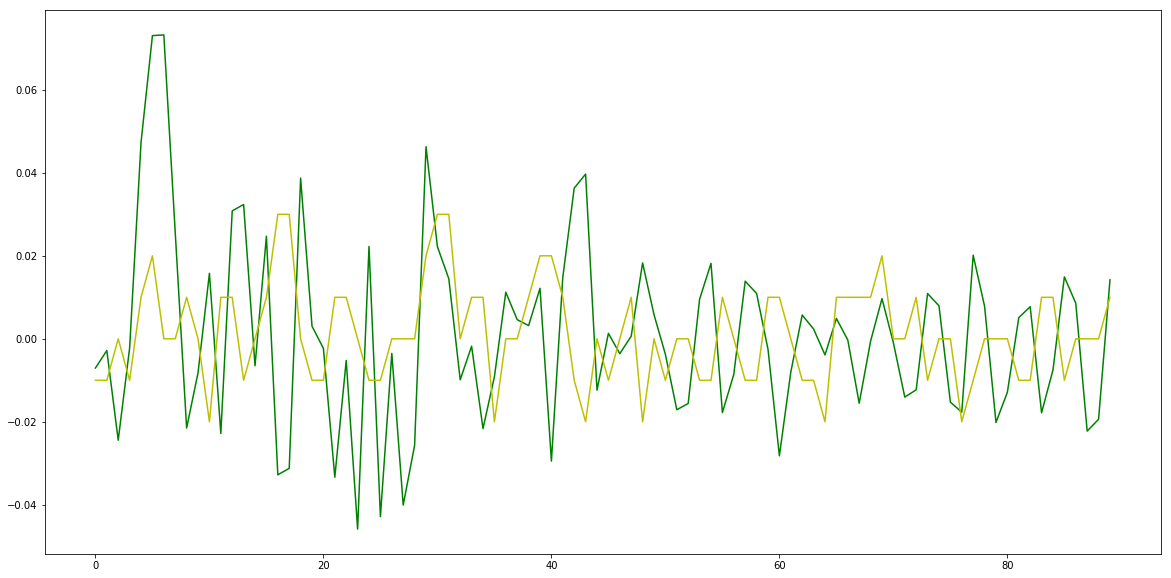

BANPU


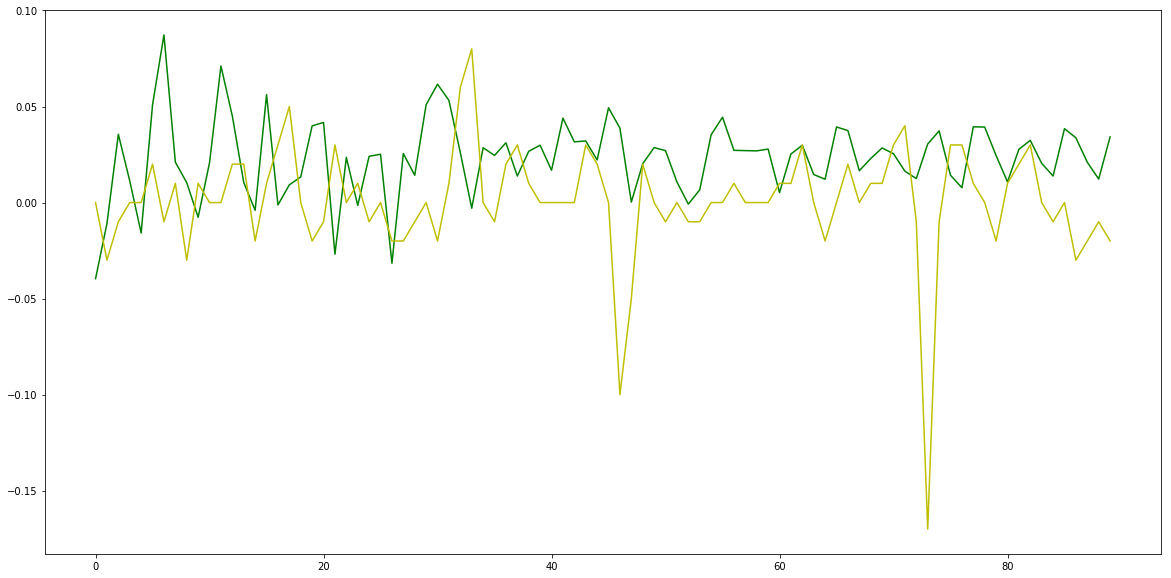

BBL


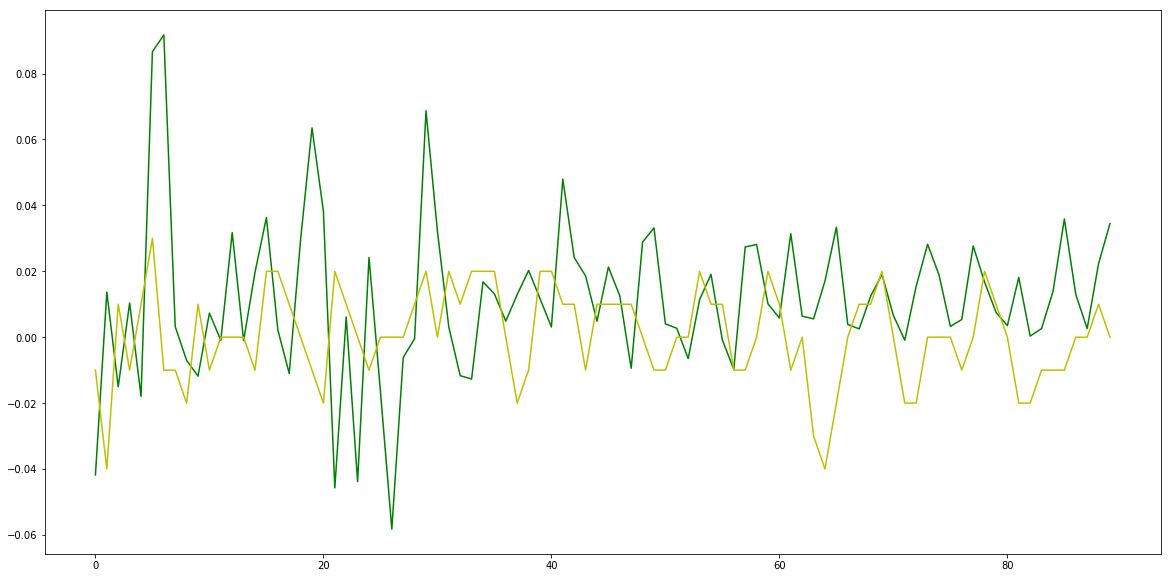

BCP


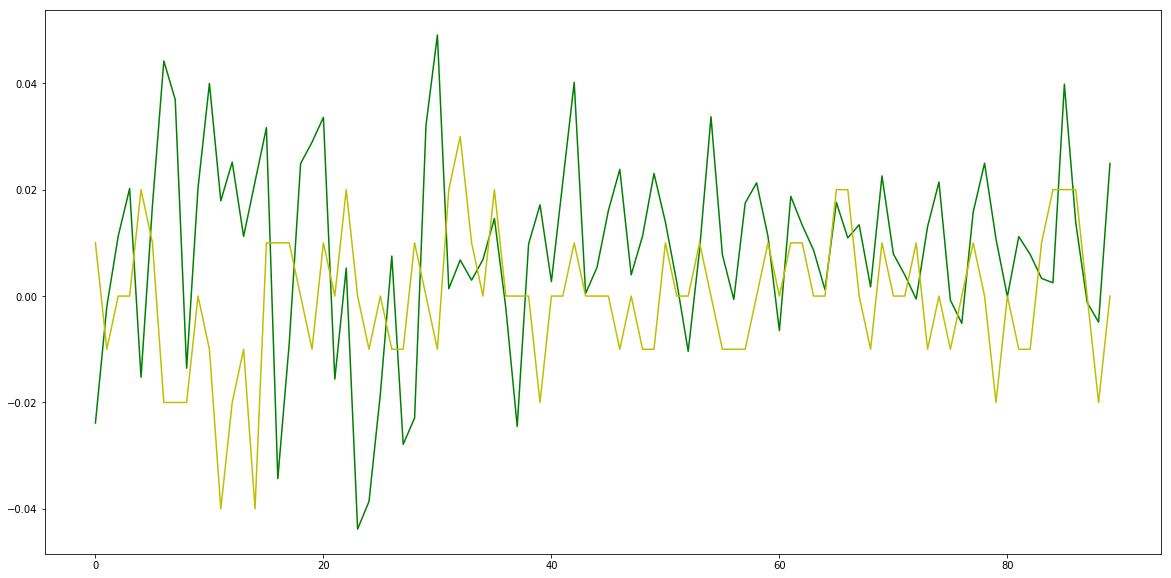

BDMS


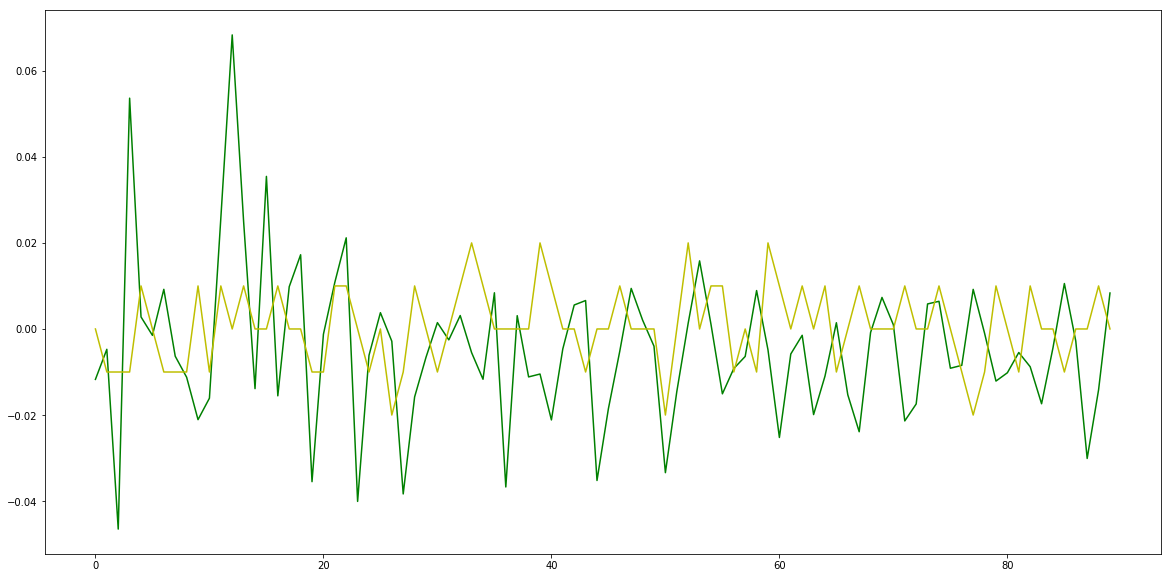

BEM


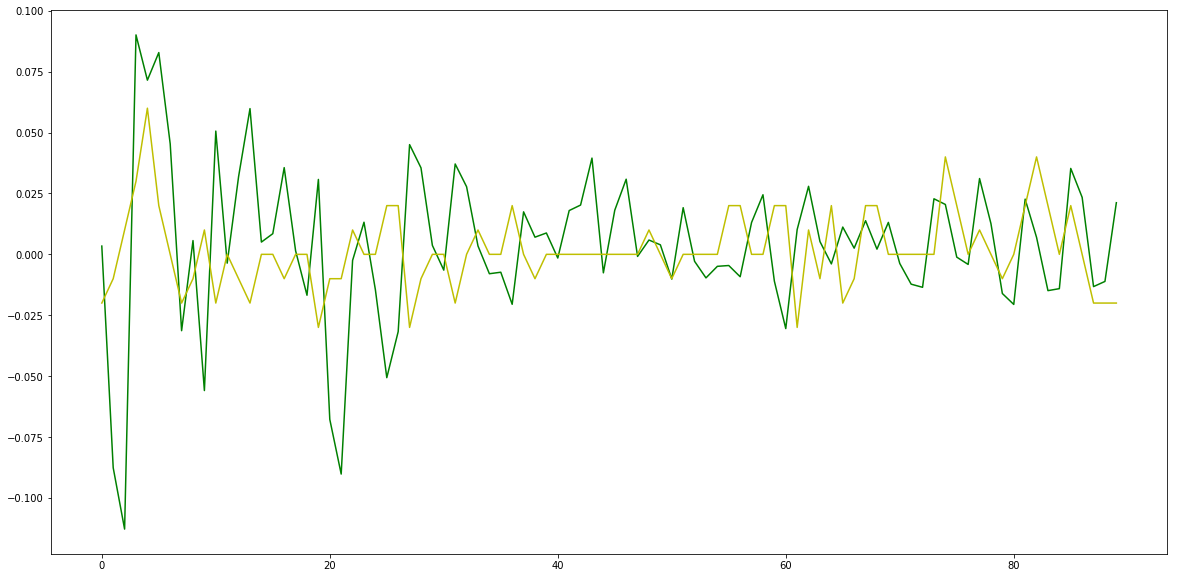

BH


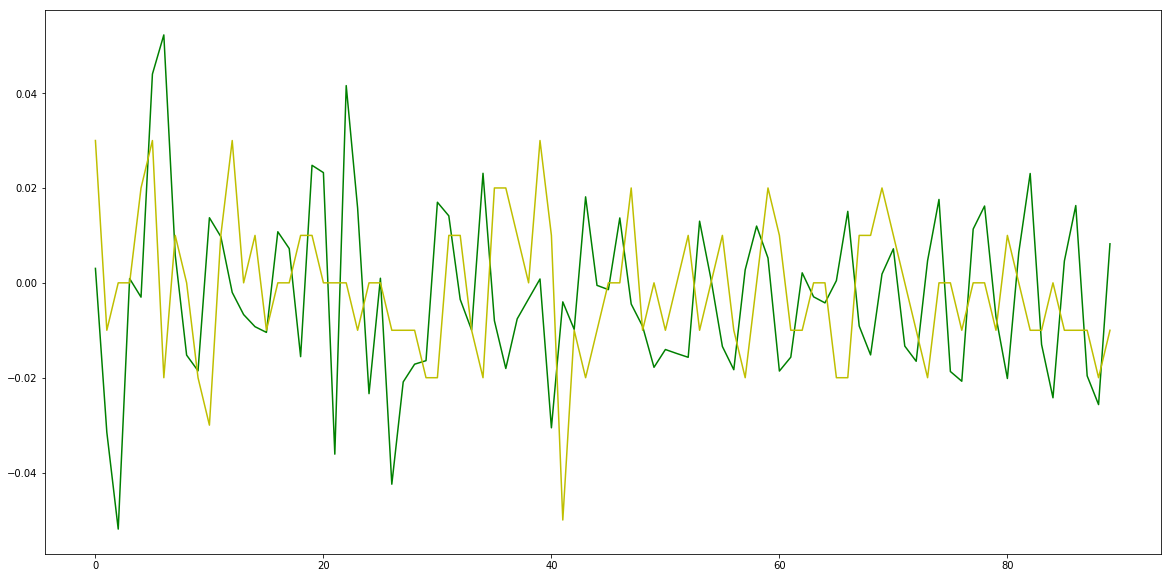

BJC


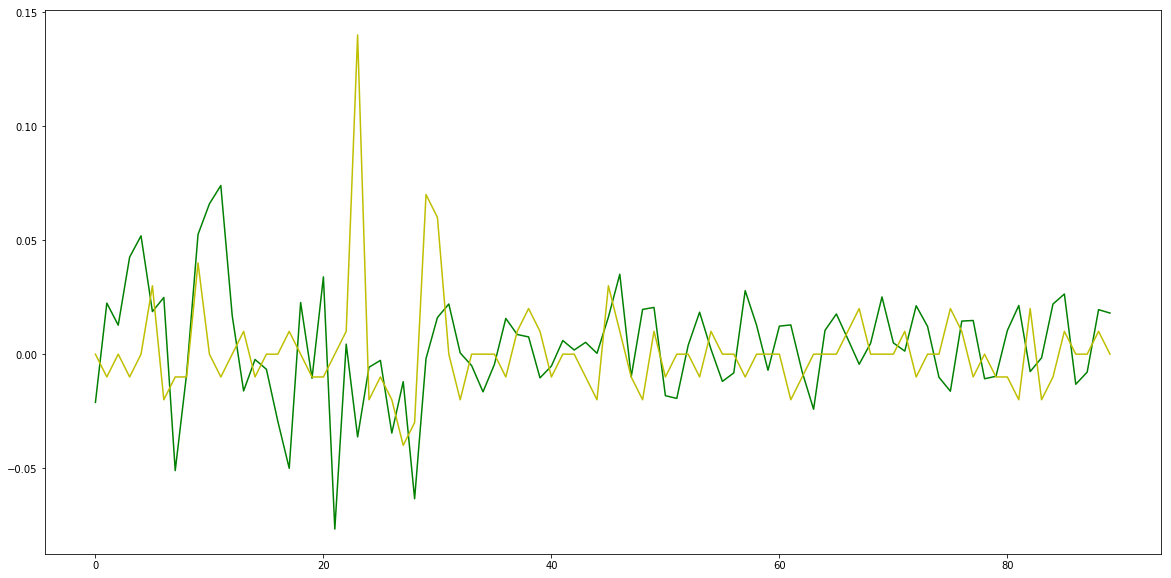

BTS


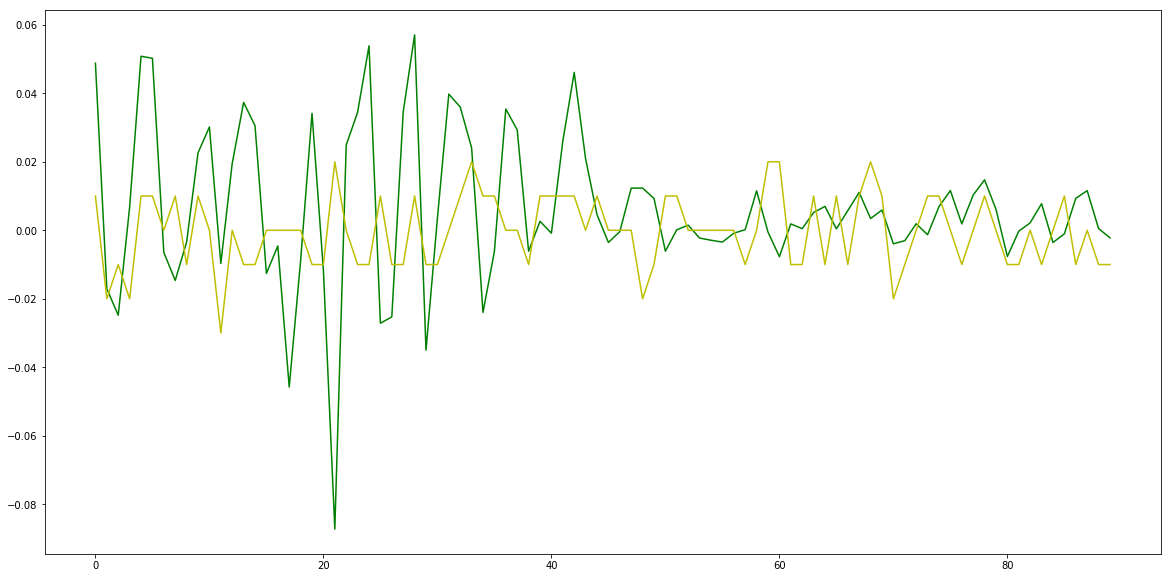

CENTEL


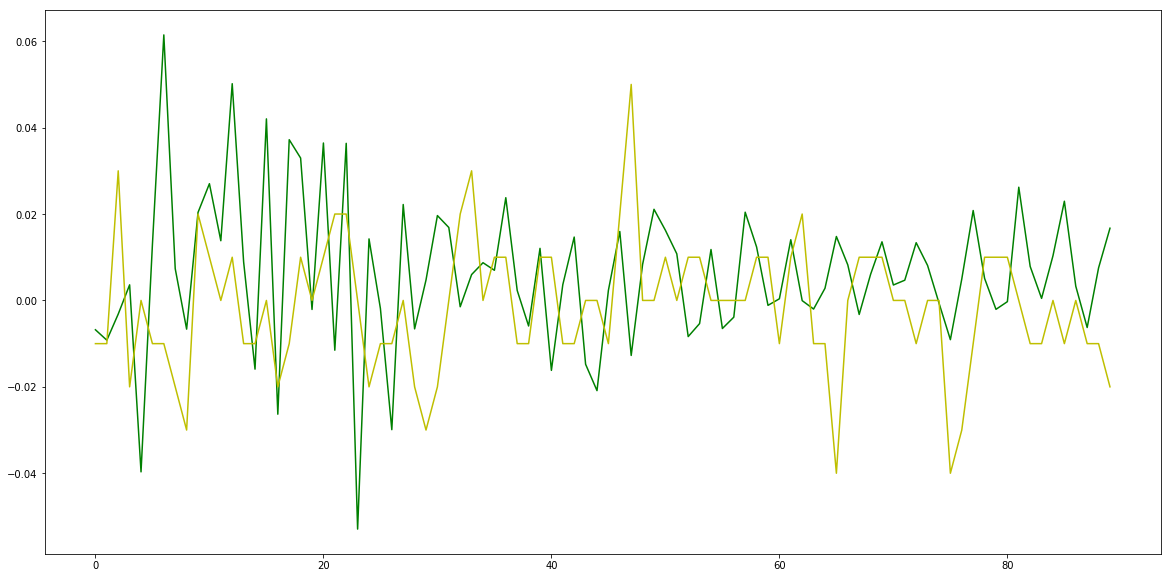

CPALL


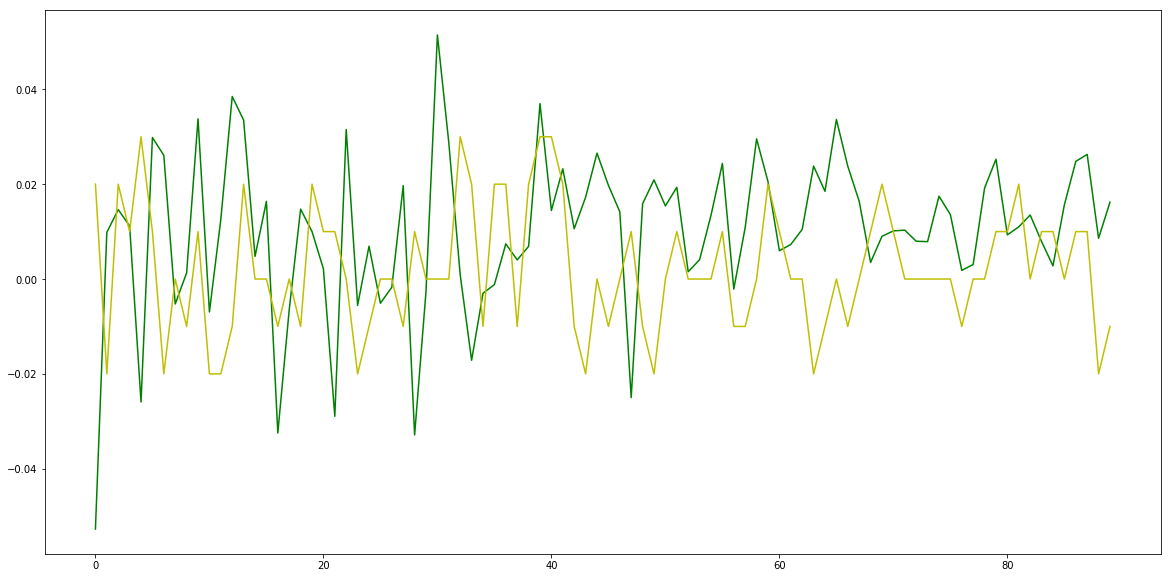

CPF


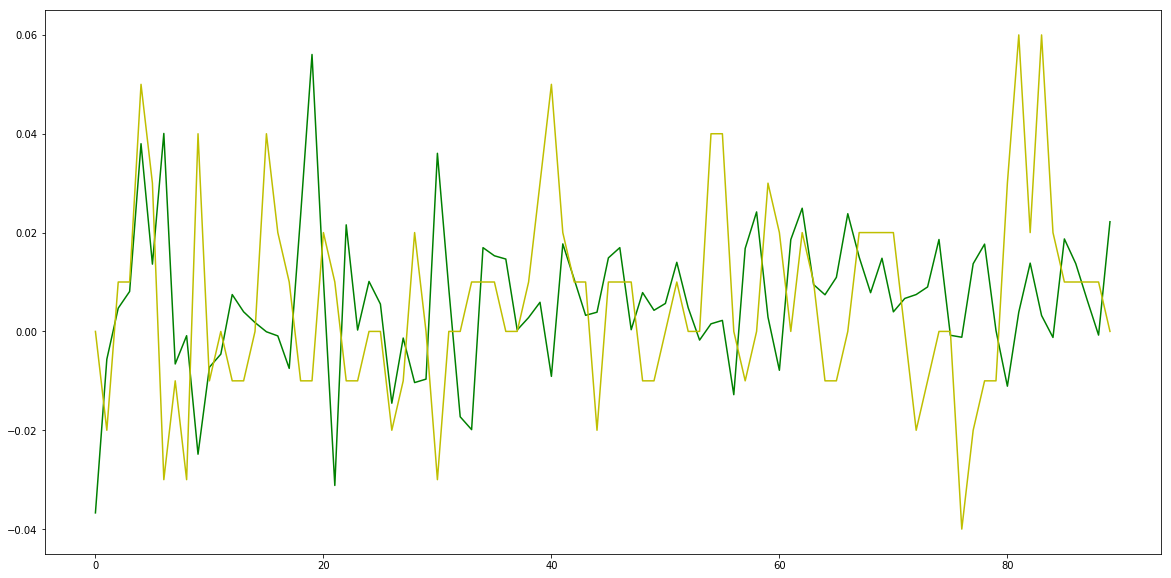

CPN


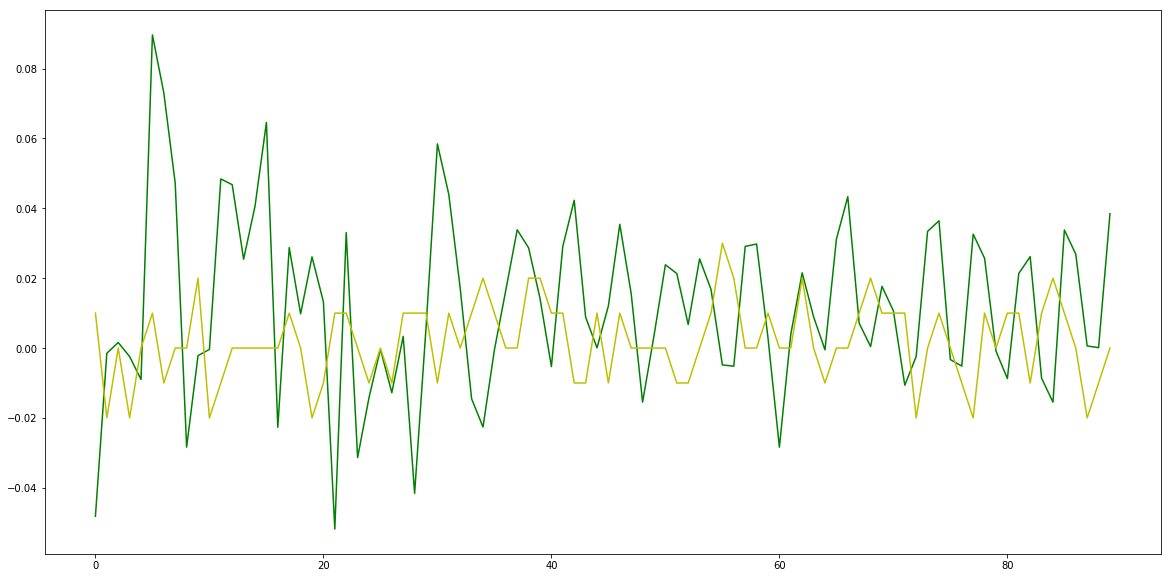

DTAC


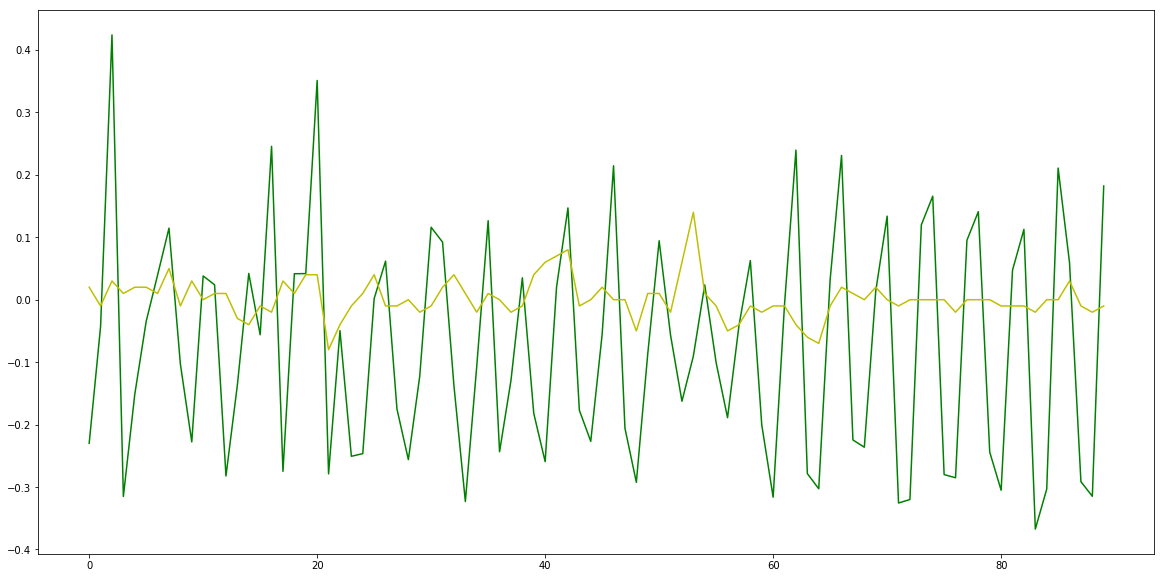

EGCO


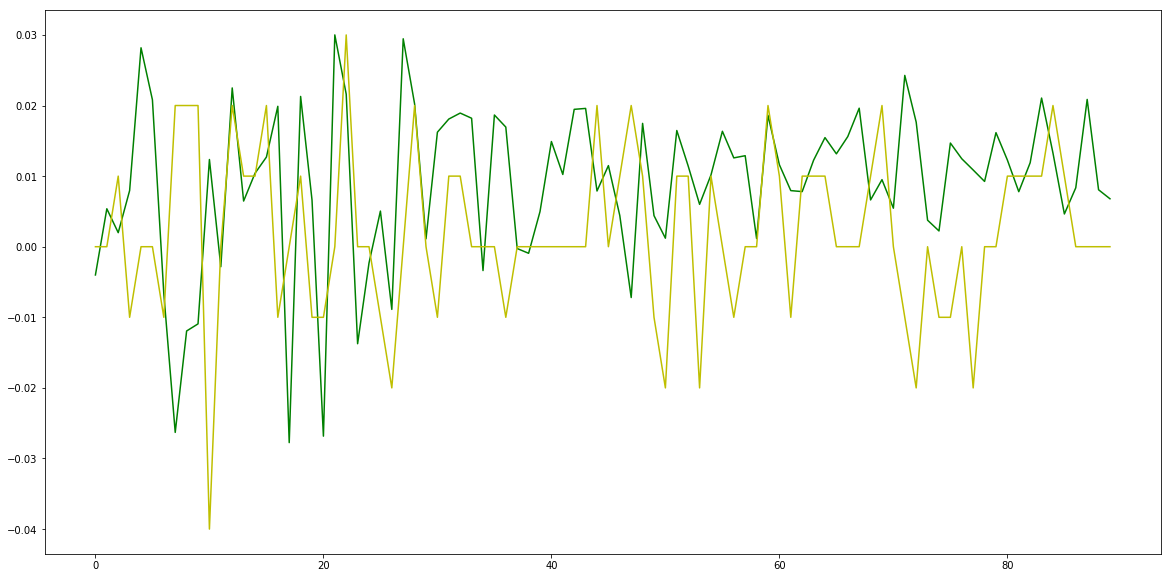

HMPRO


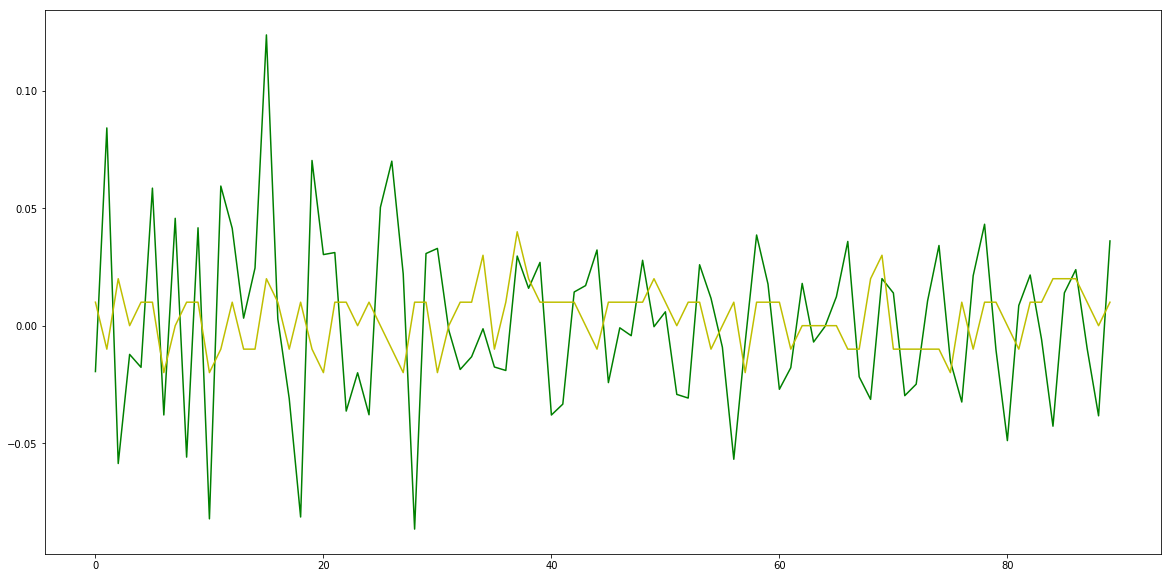

INTUCH


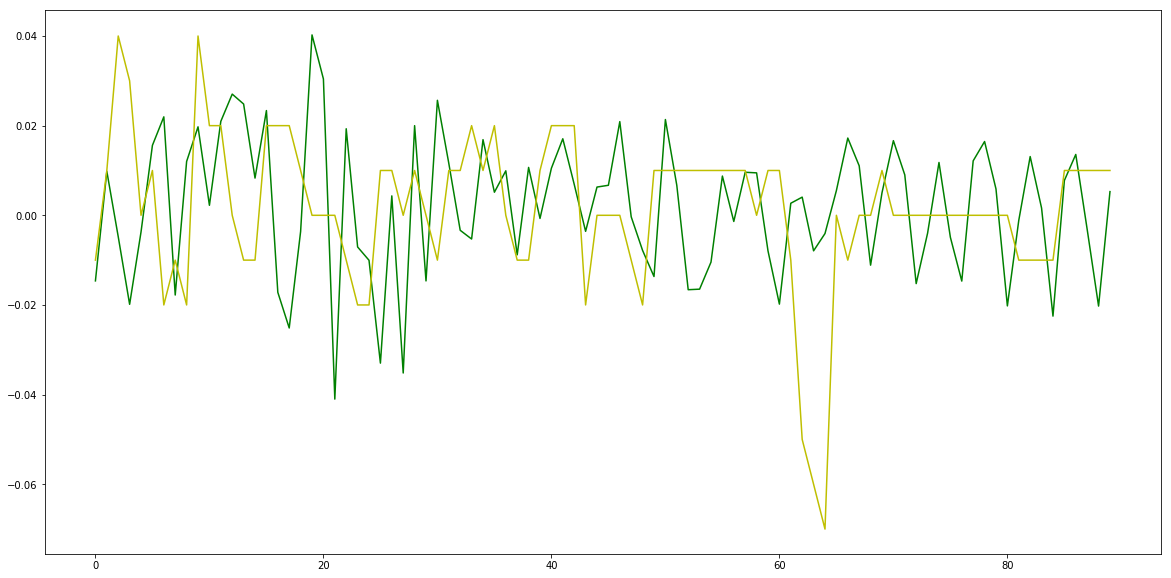

IRPC


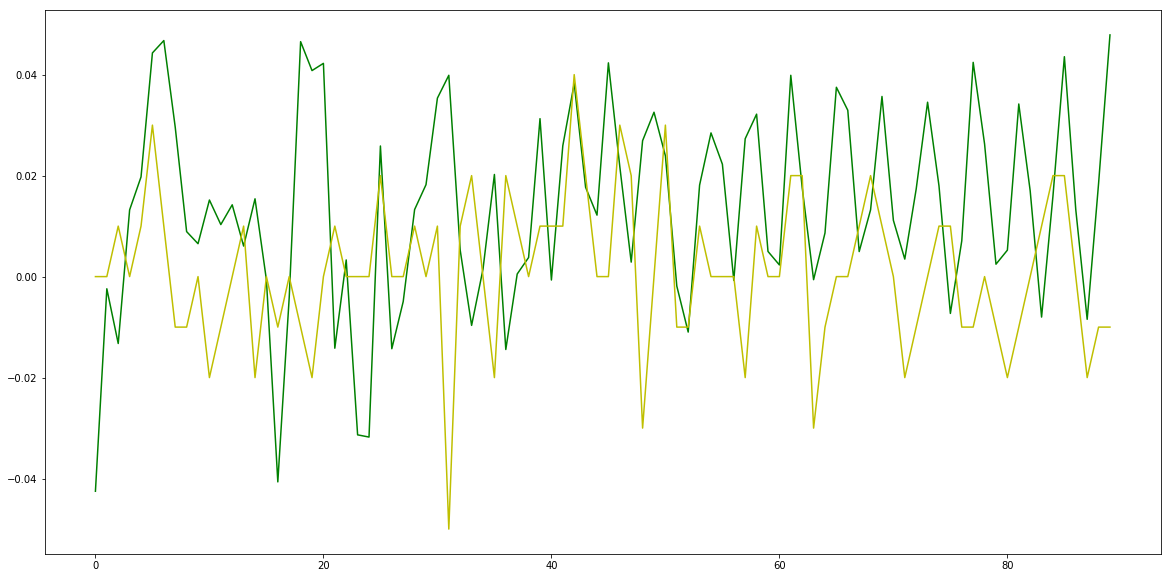

KBANK


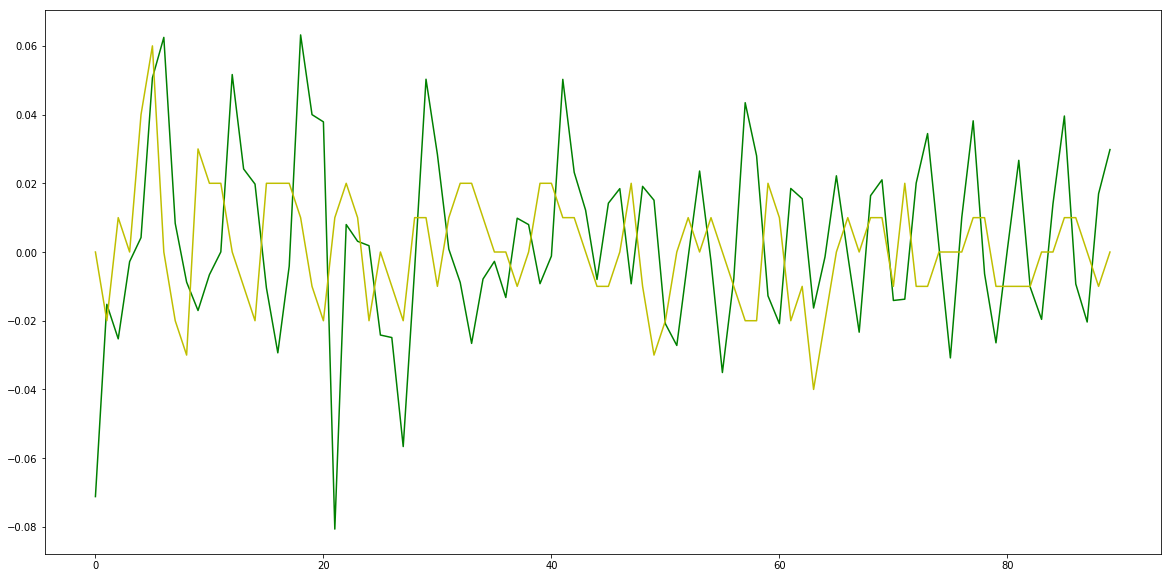

KCE


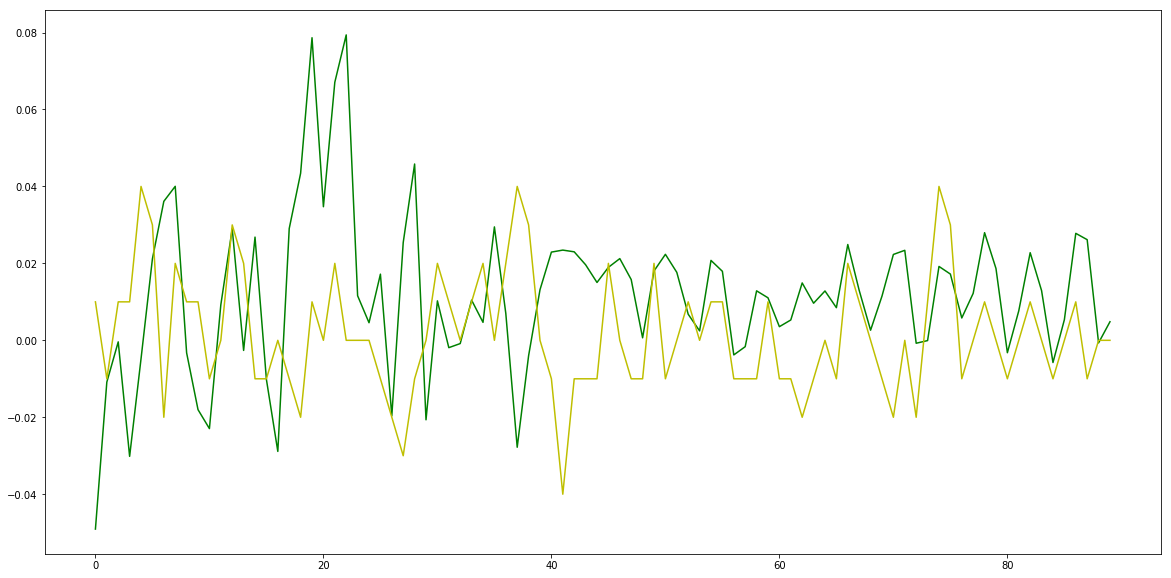

KKP


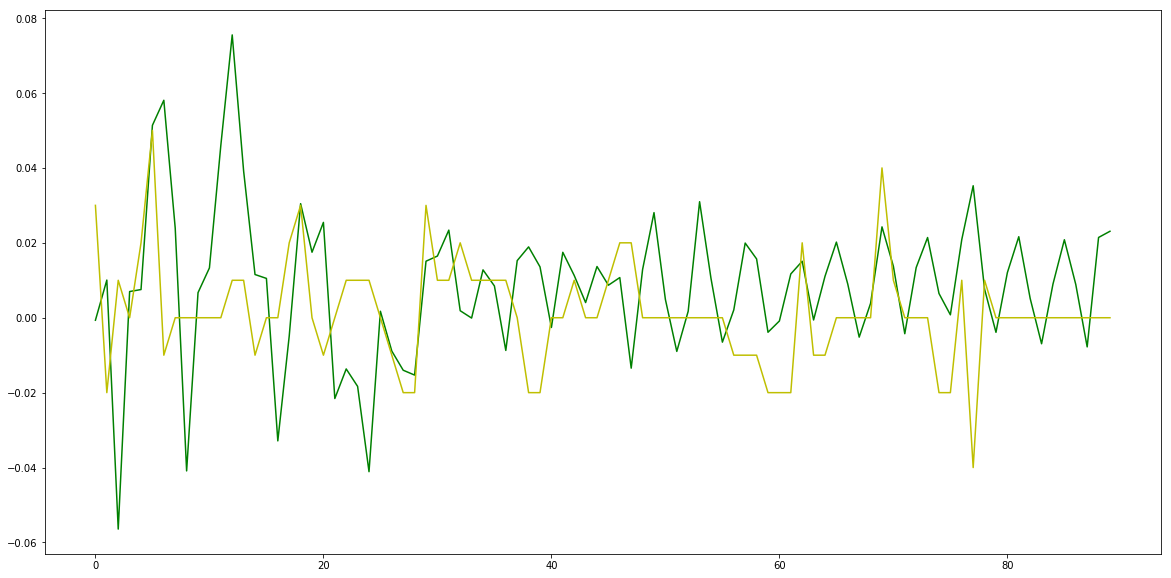

KTB


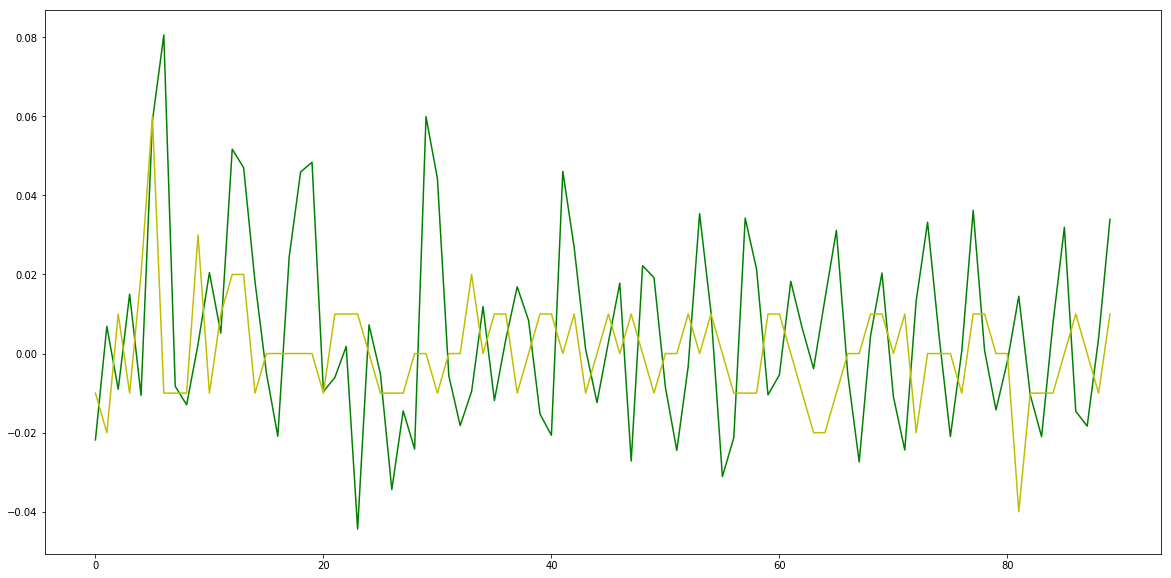

LH


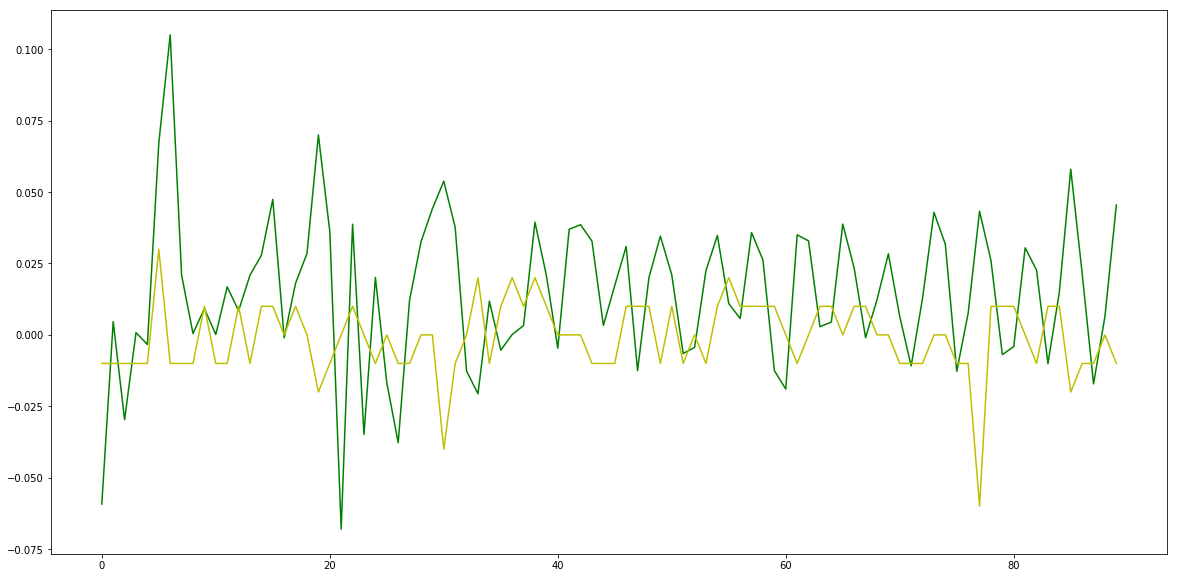

MINT


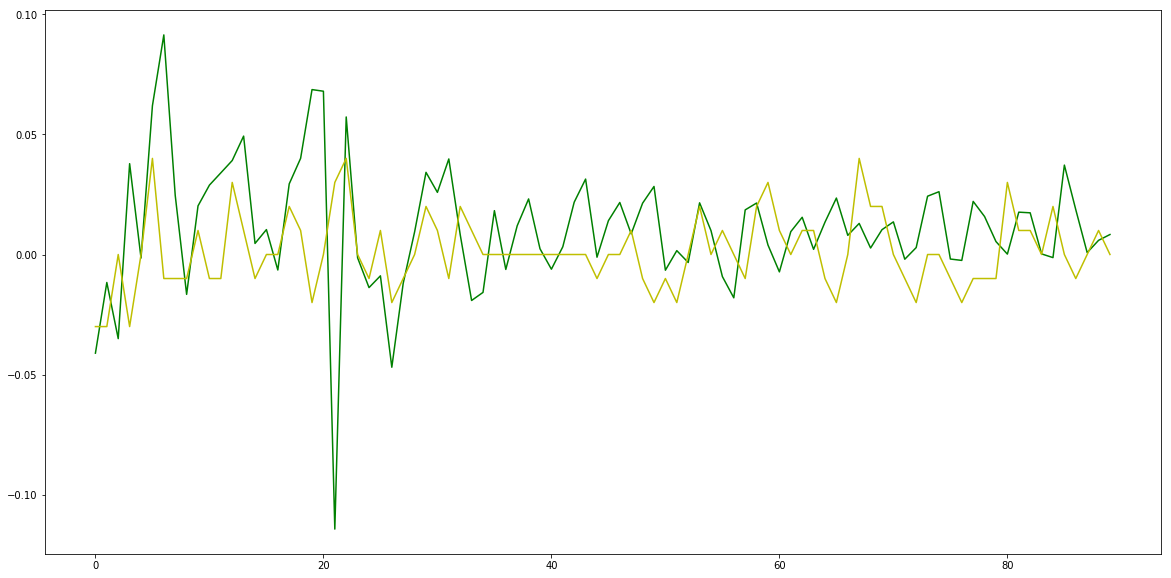

PTT


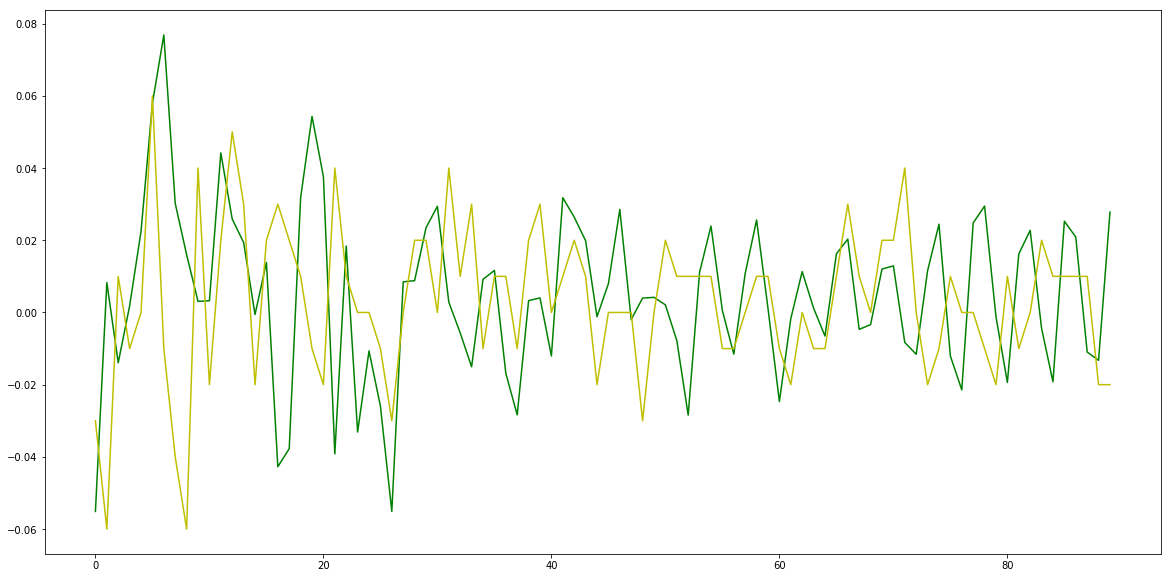

PTTEP


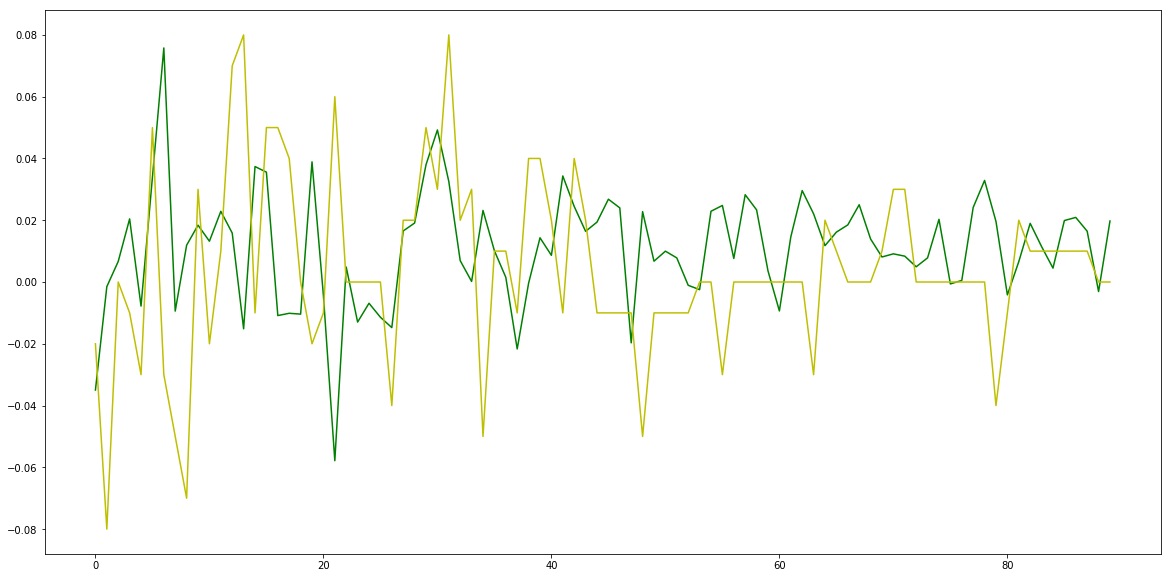

ROBINS


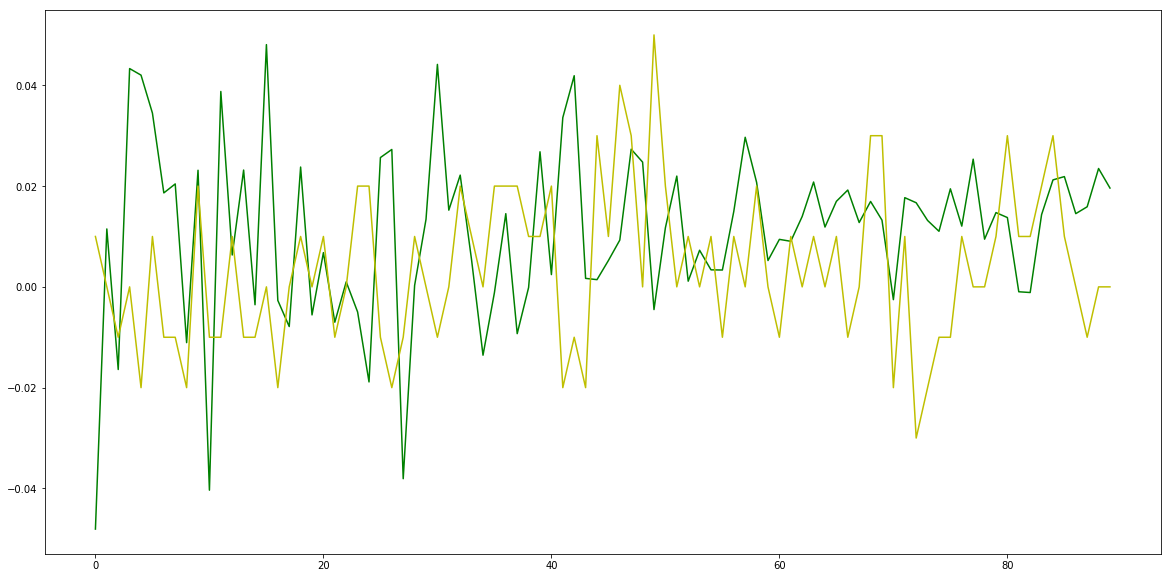

SCB


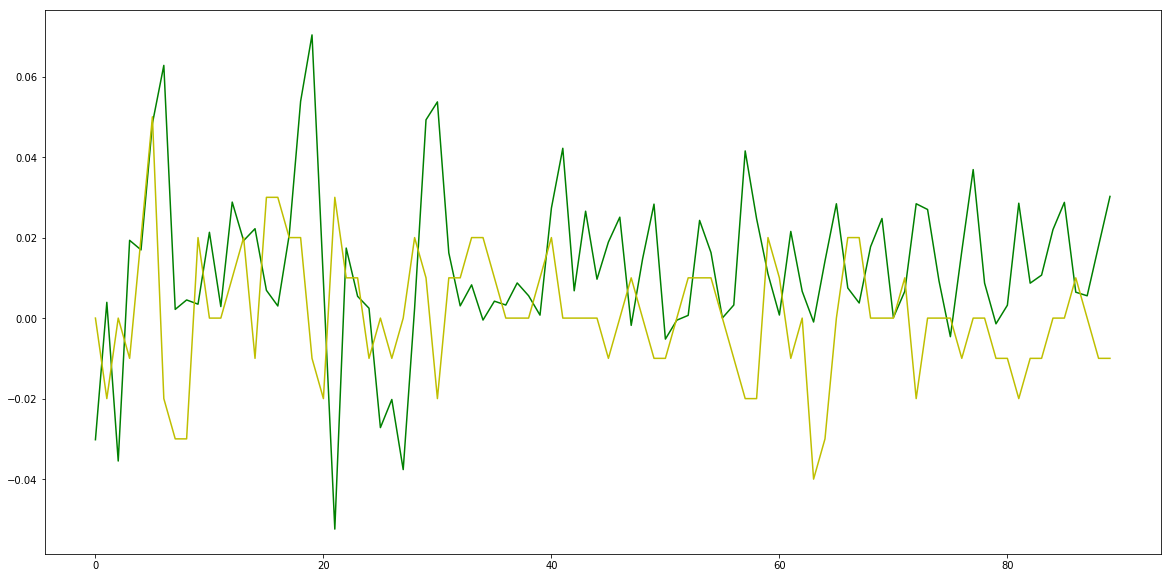

SCC


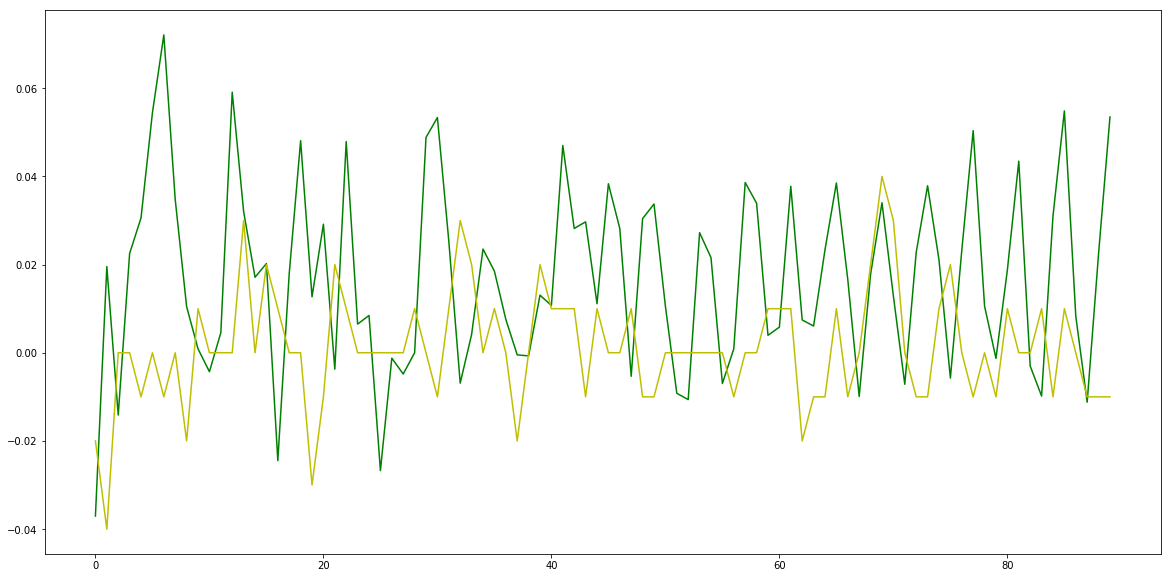

TCAP


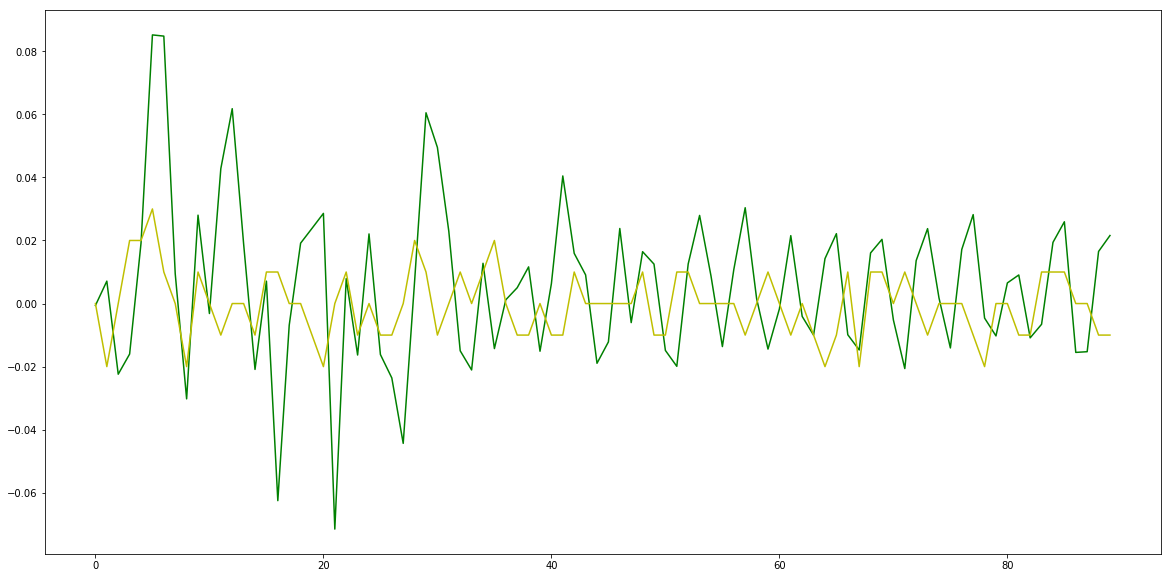

TISCO


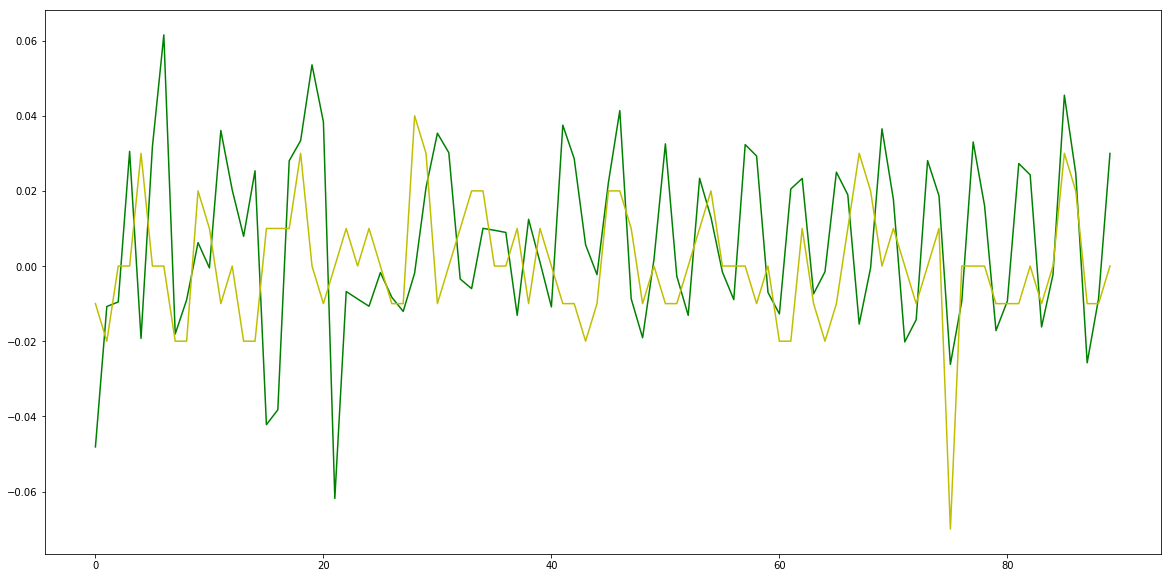

TMB


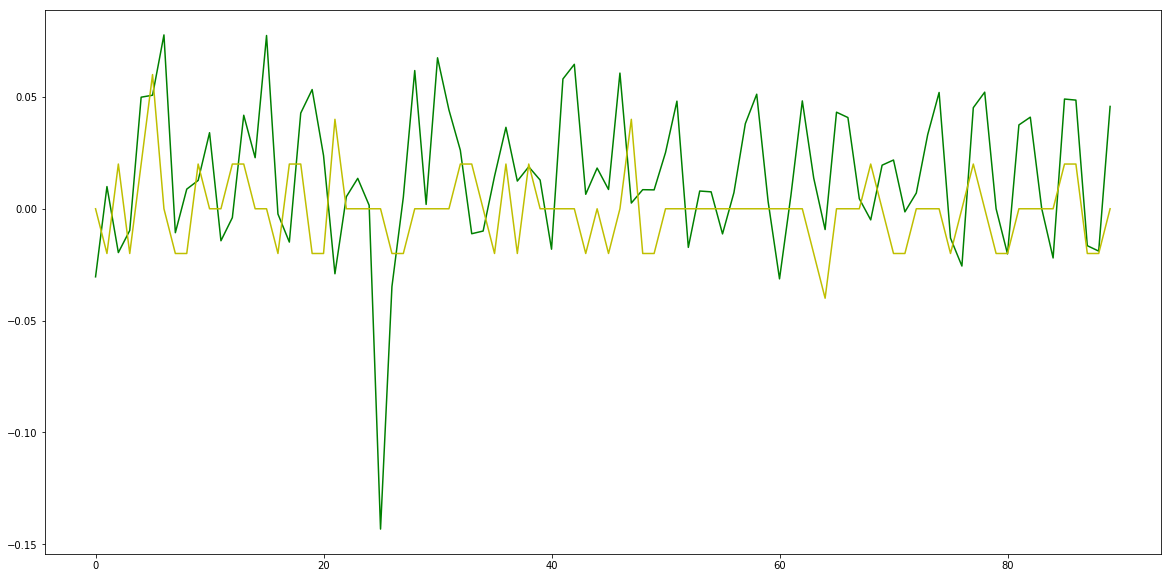

TOP


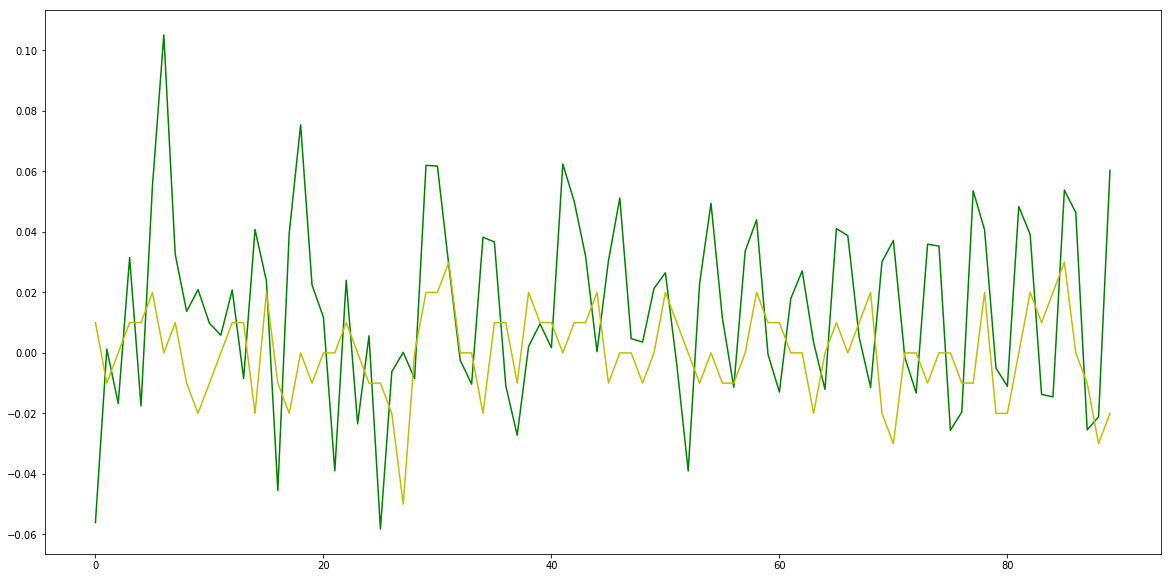

TRUE


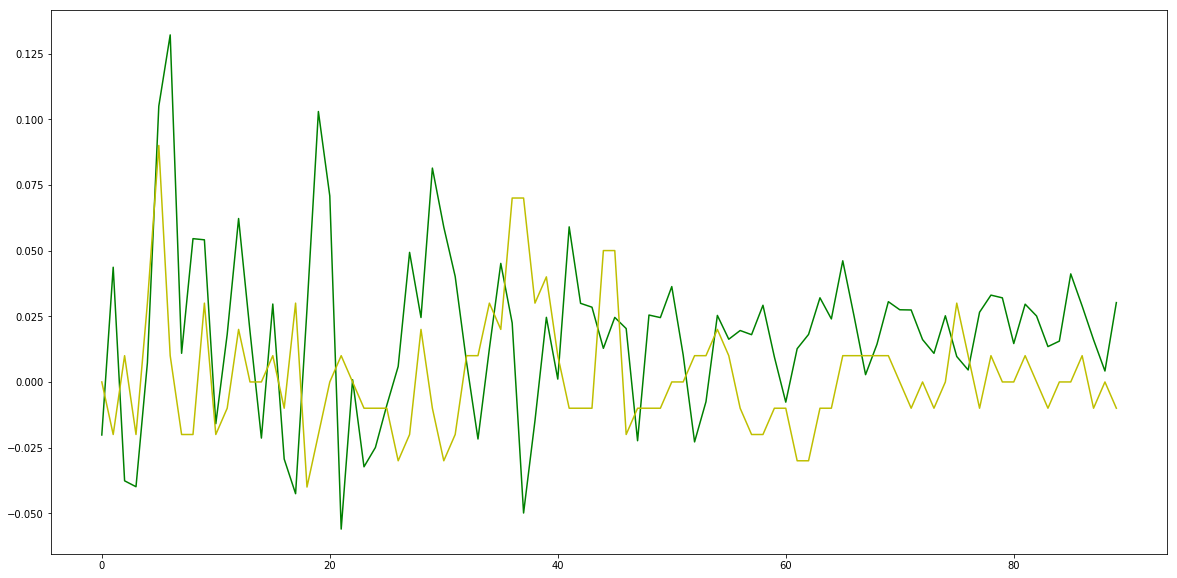

TU


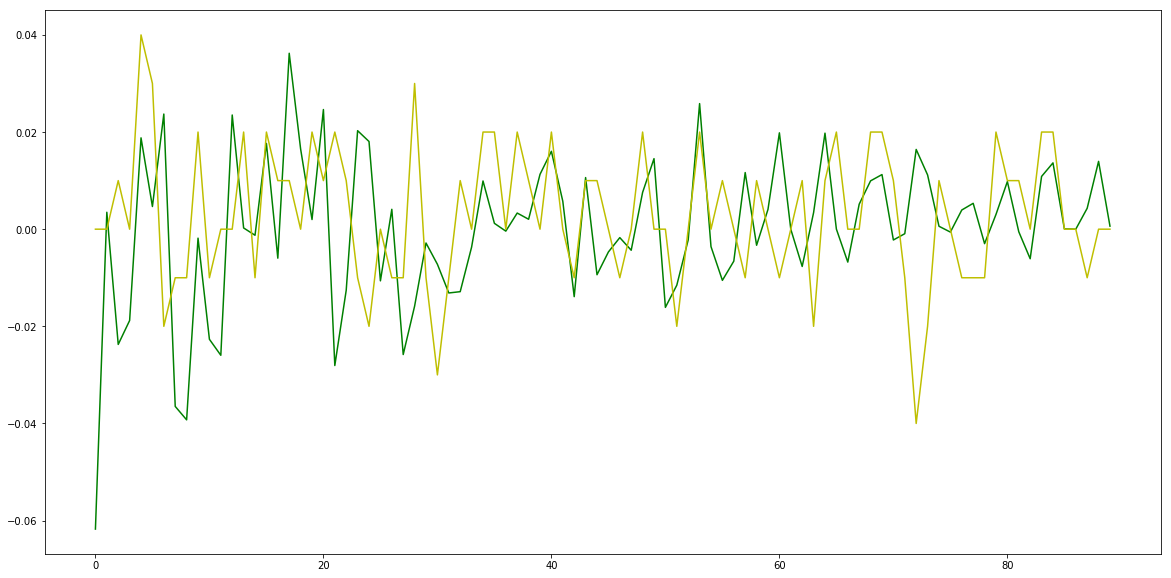

In [46]:
for i in range(len(SET50)):
    print(SET50[i])
    data1 = get_data_from_nparray(predicts[0: 90], i)
    data4 = get_data_from_nparray(y_test[0: 90], i)
    plot_graph(data1, data4)

ADVANC


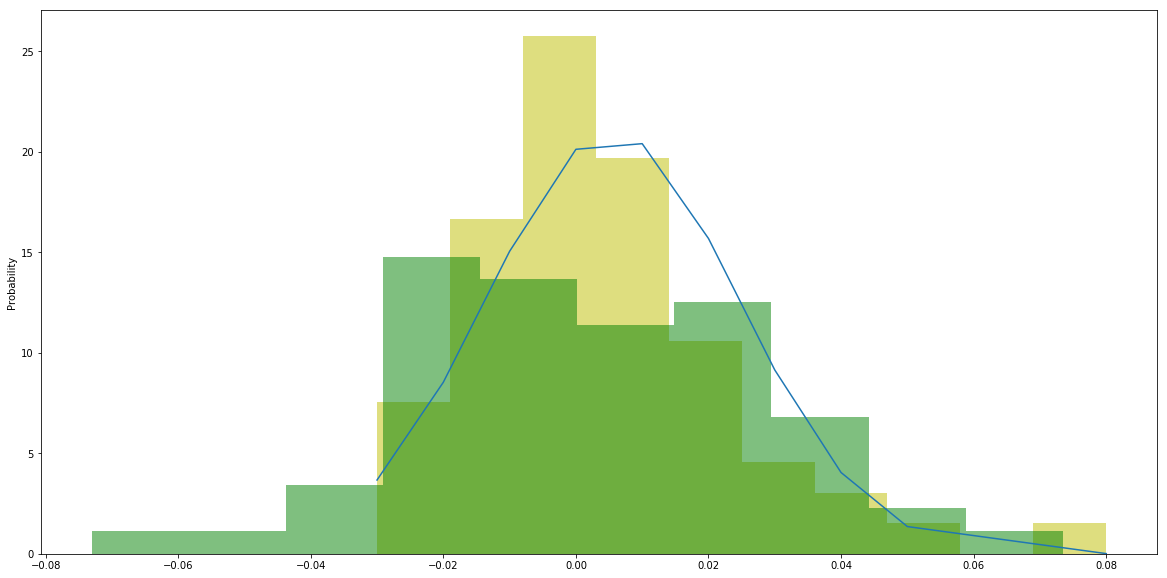

AOT


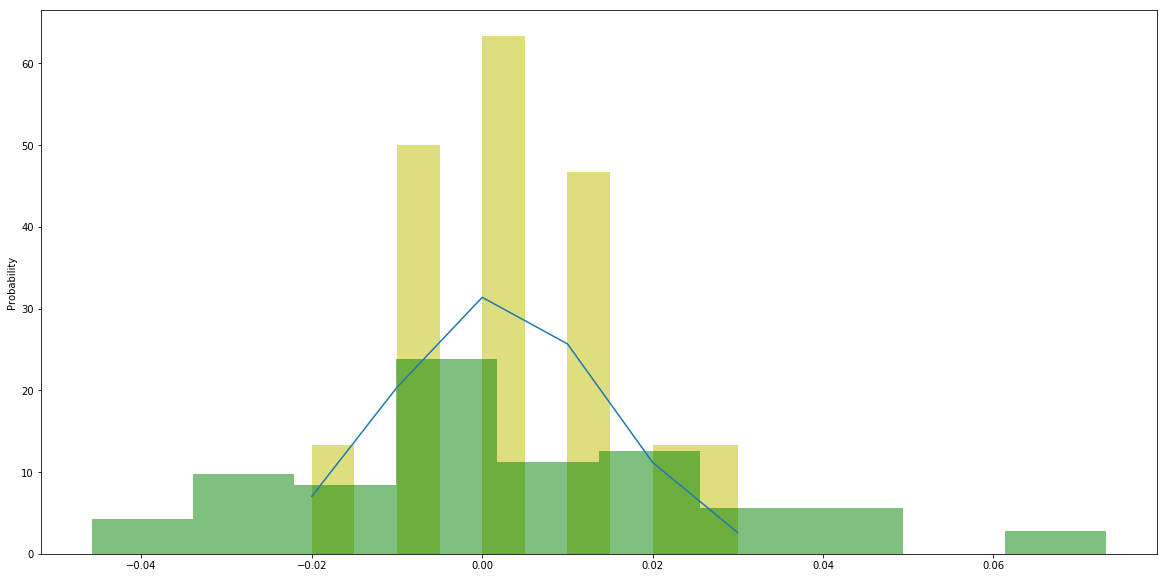

BANPU


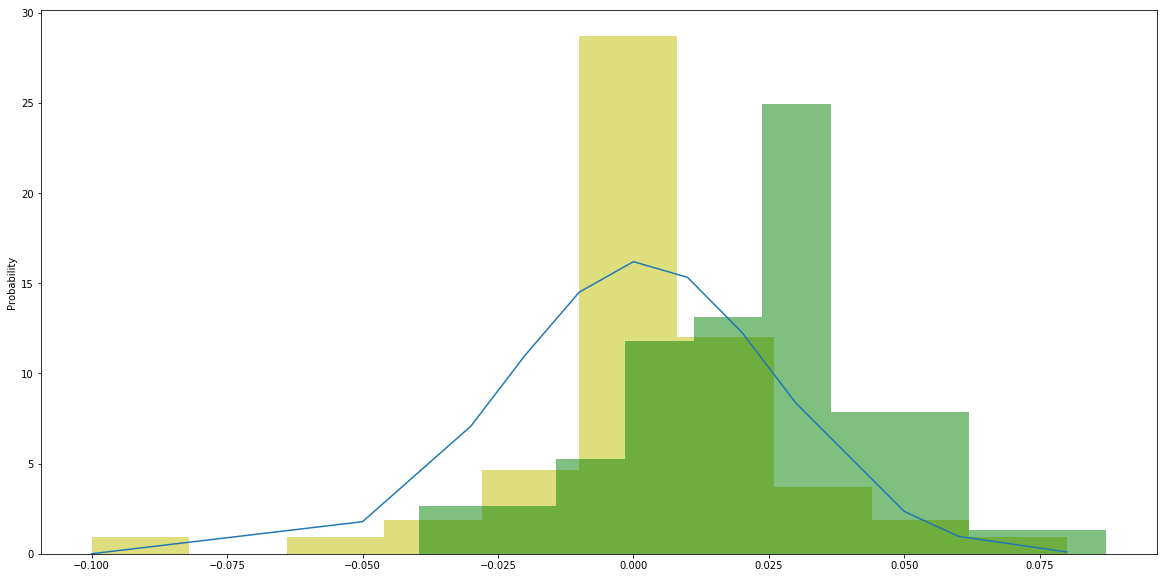

BBL


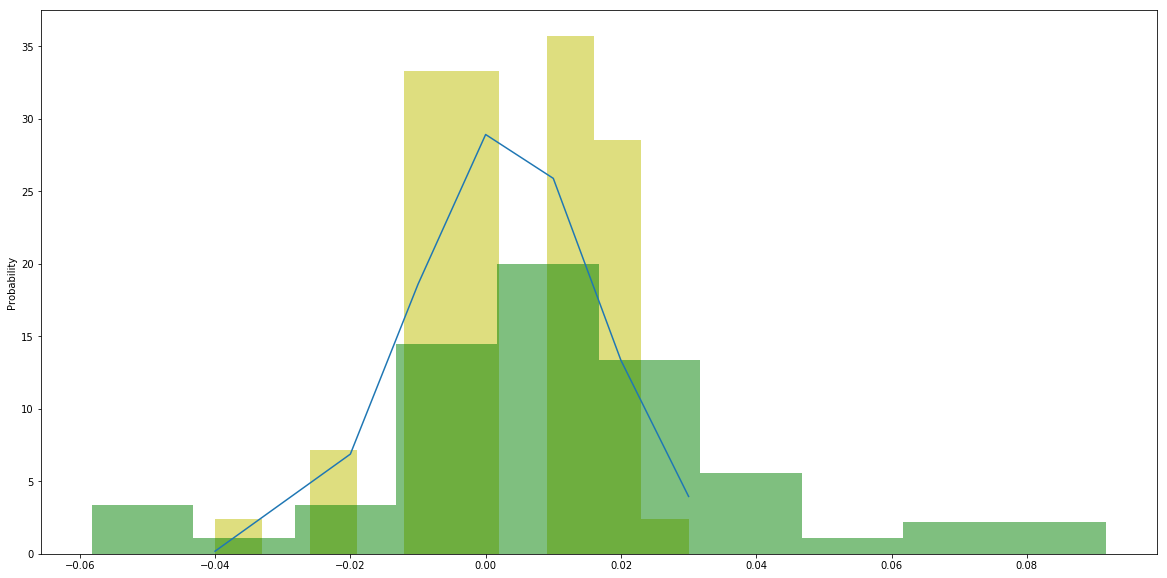

BCP


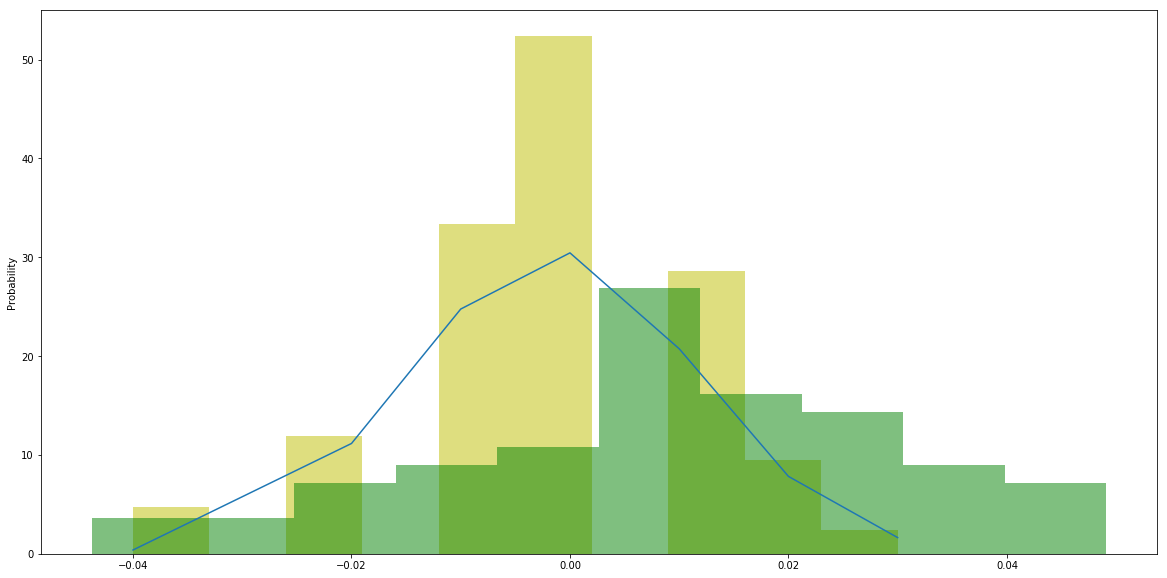

BDMS


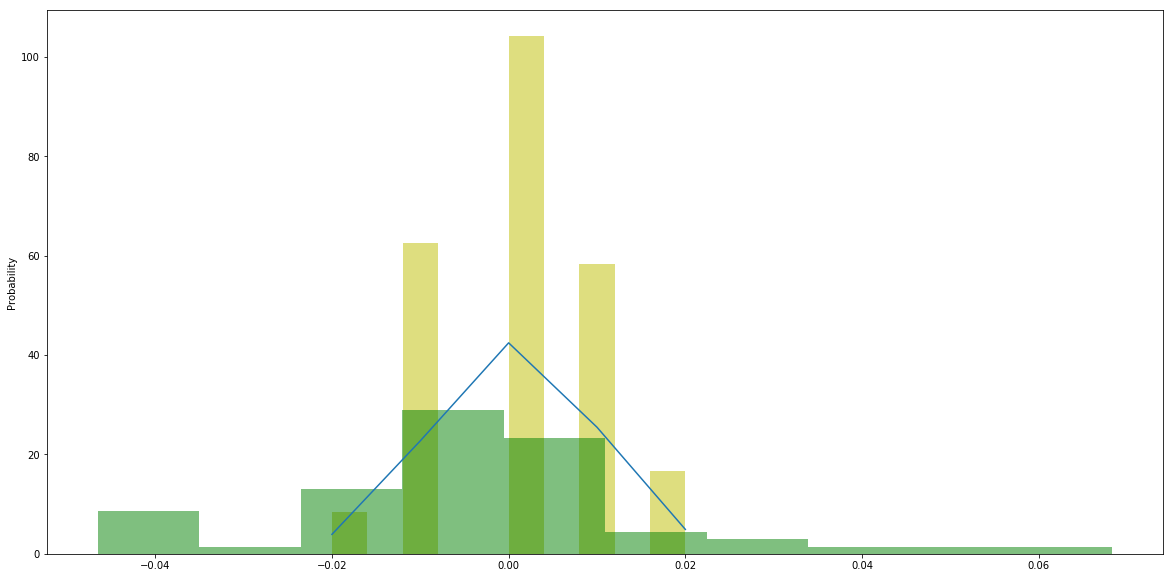

BEM


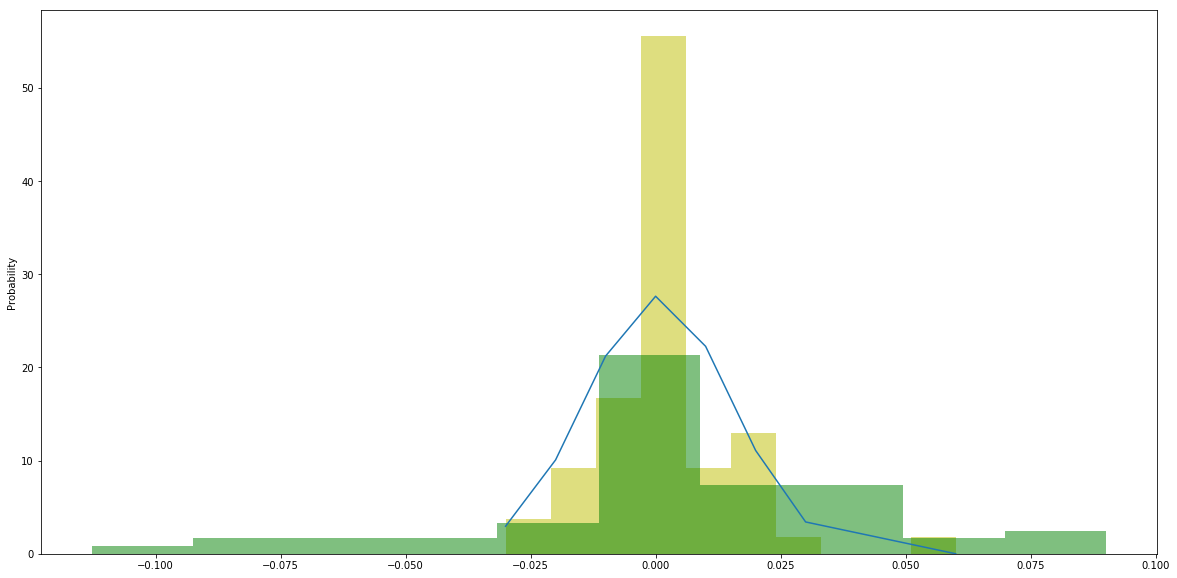

BH


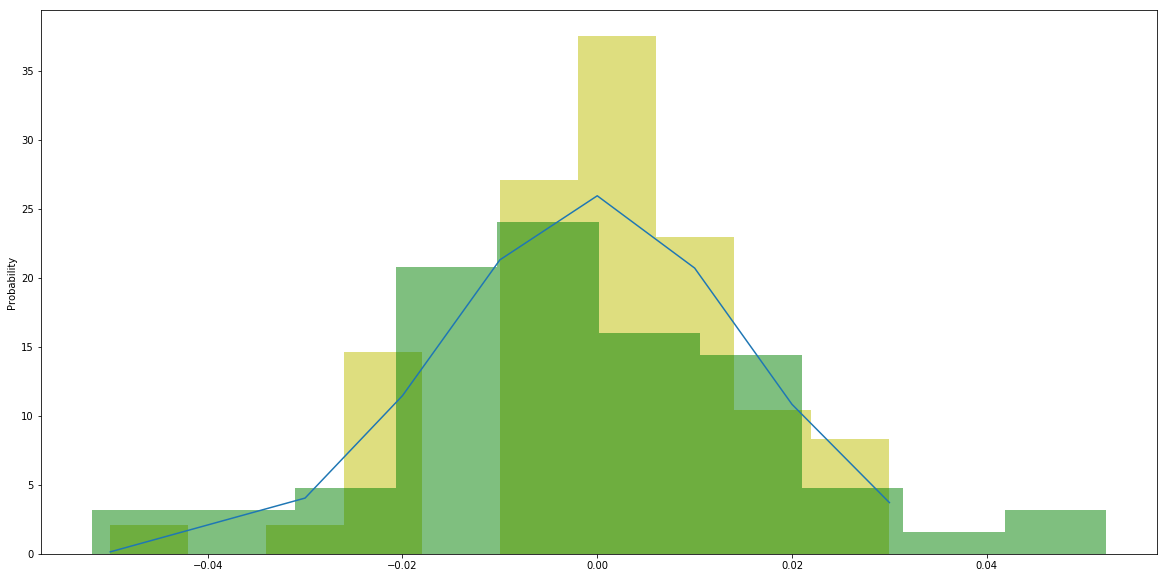

BJC


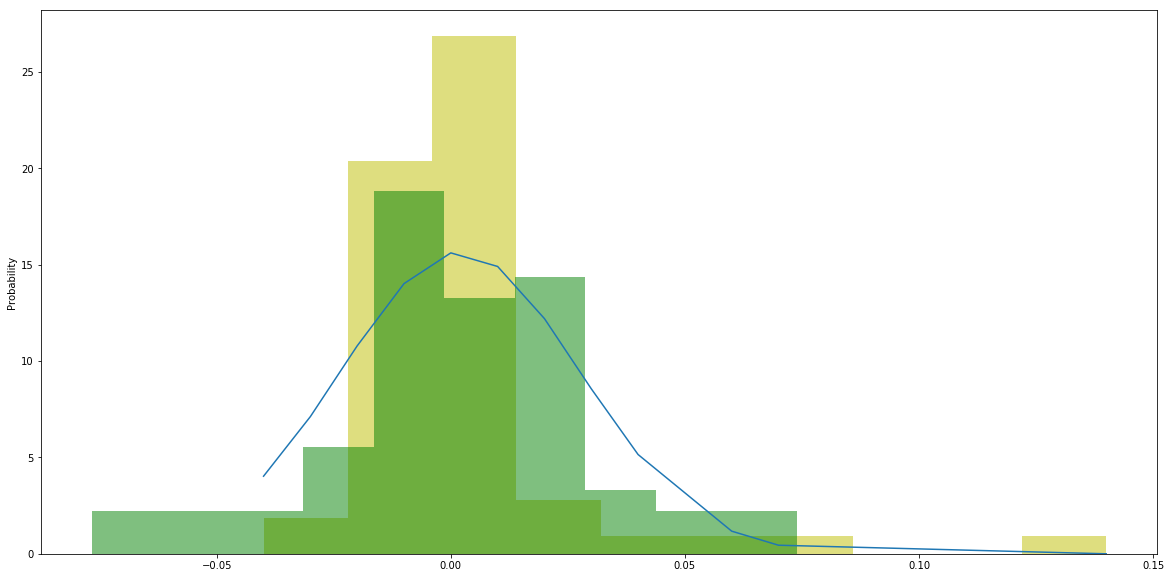

BTS


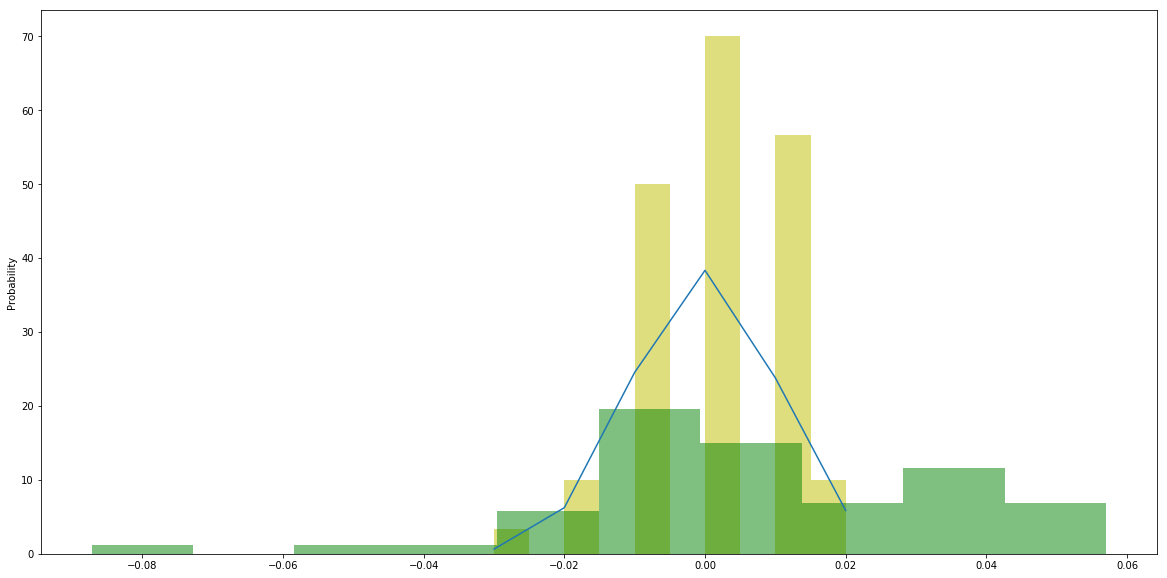

CENTEL


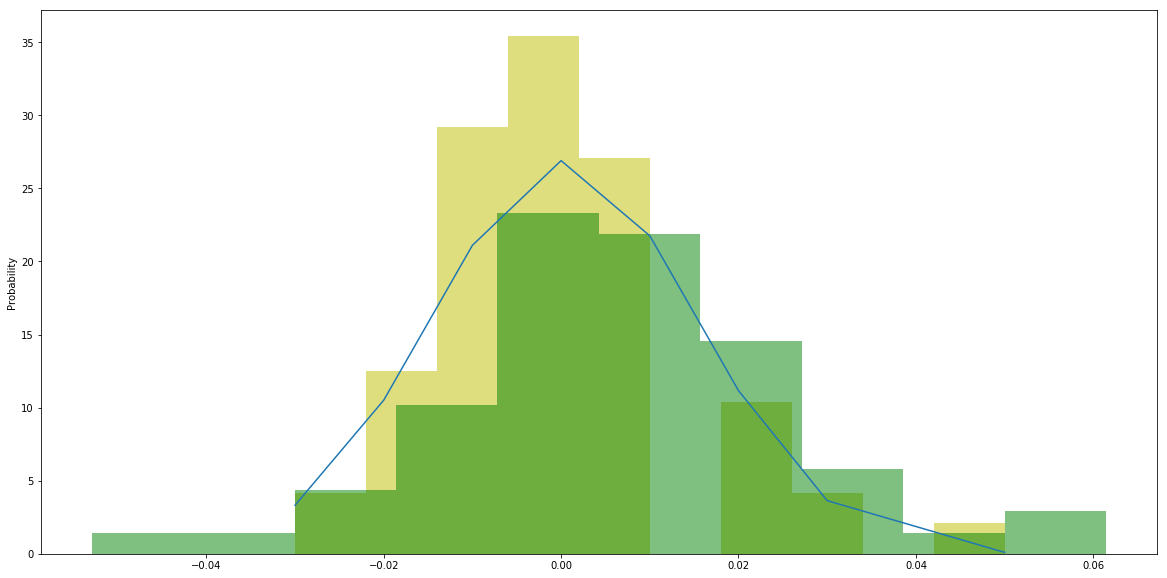

CPALL


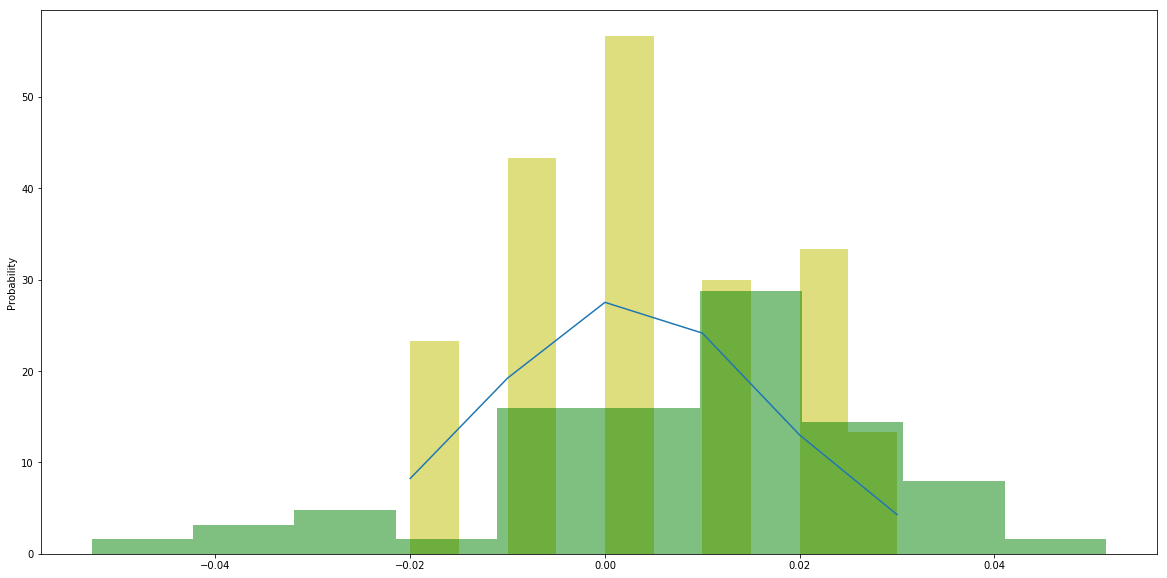

CPF


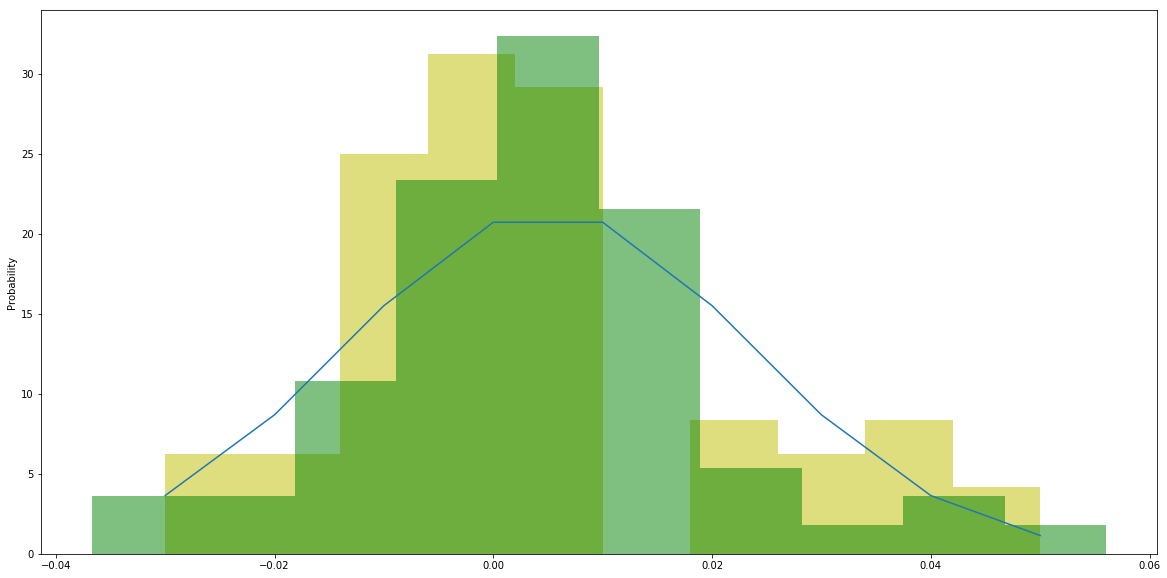

CPN


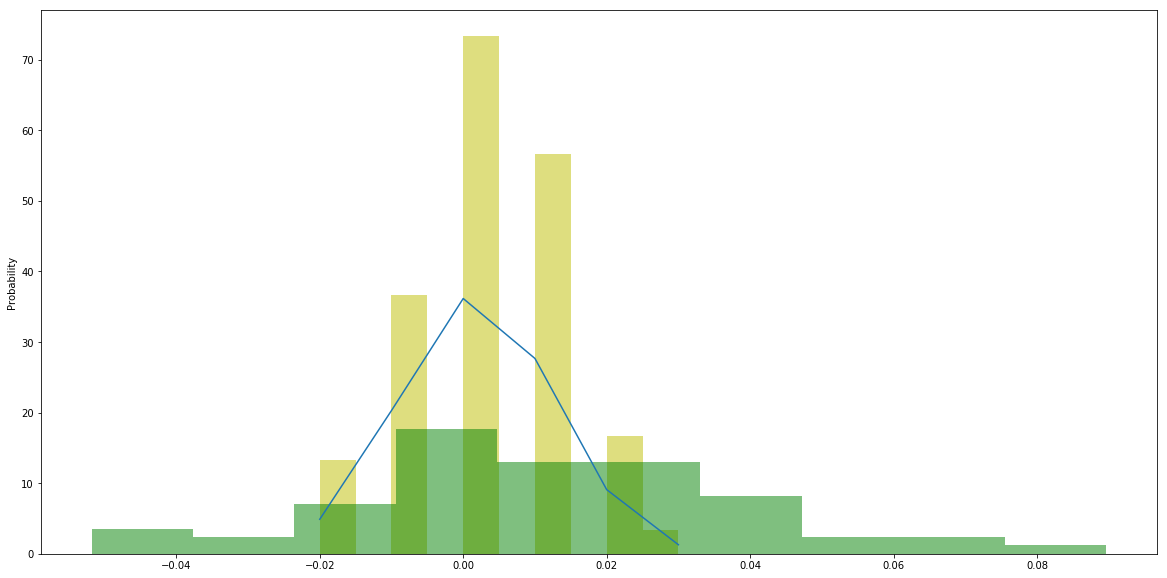

DTAC


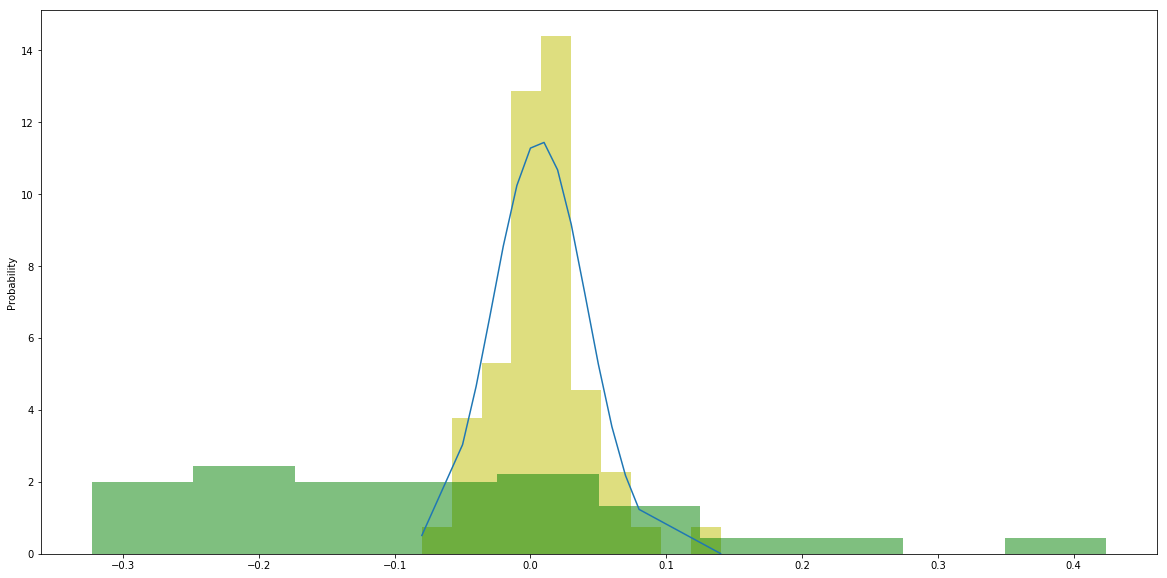

EGCO


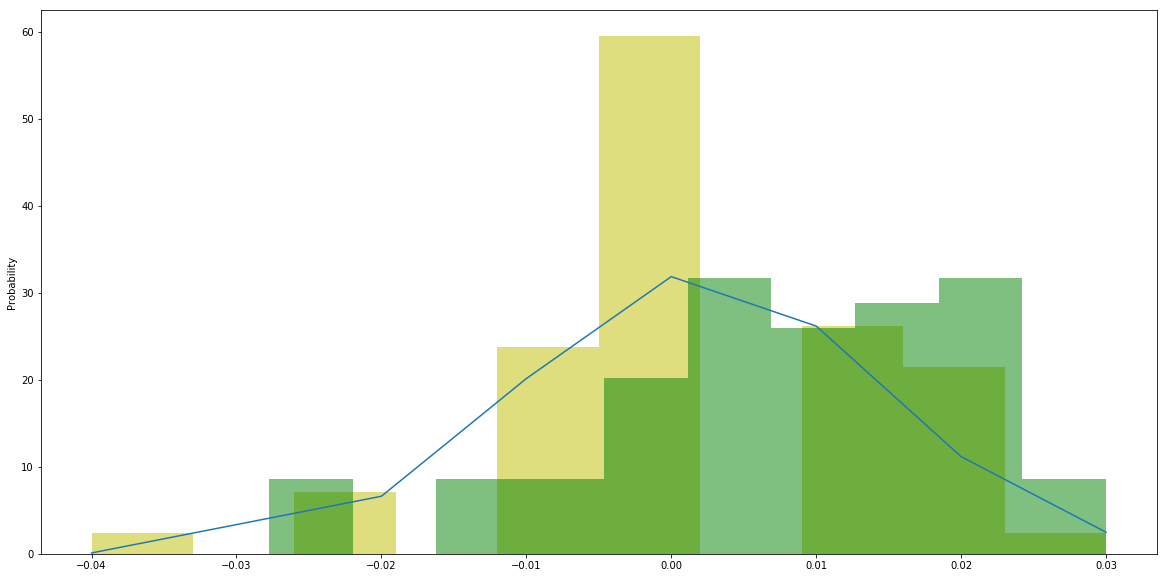

HMPRO


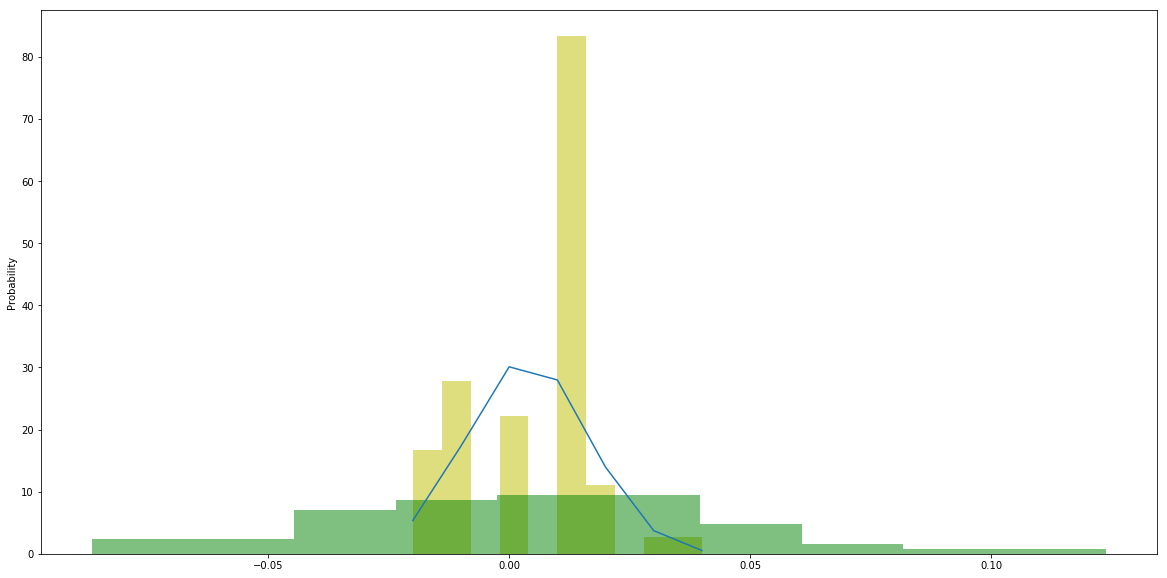

INTUCH


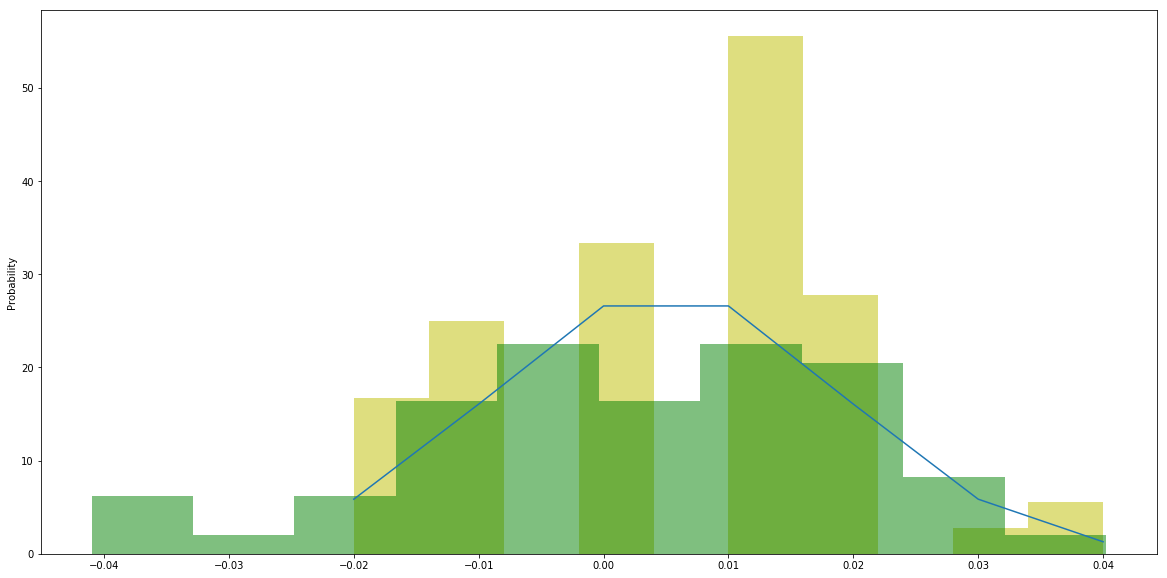

IRPC


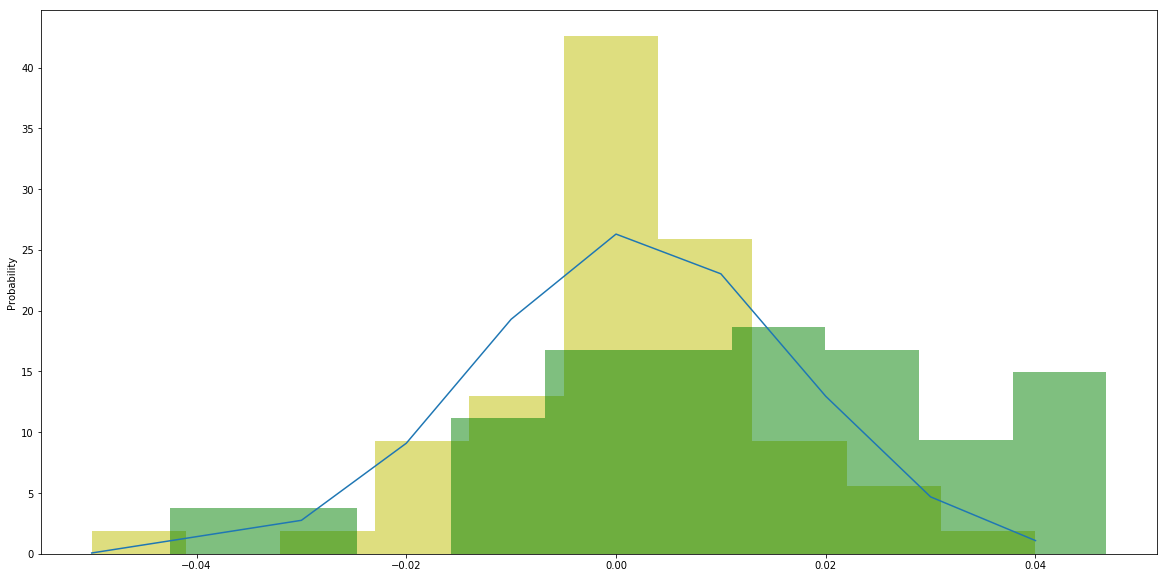

KBANK


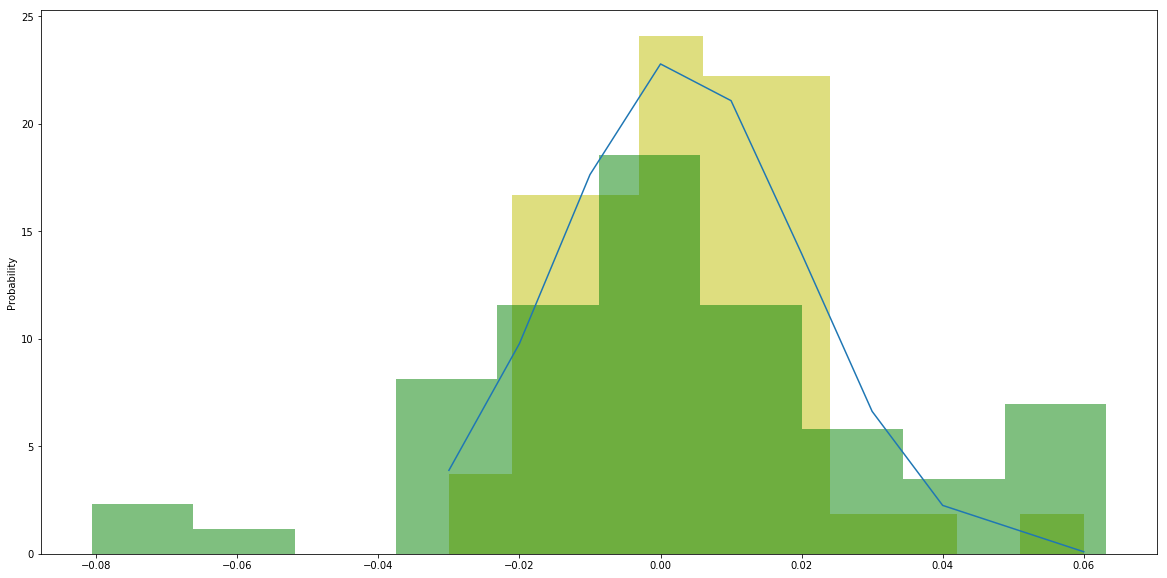

KCE


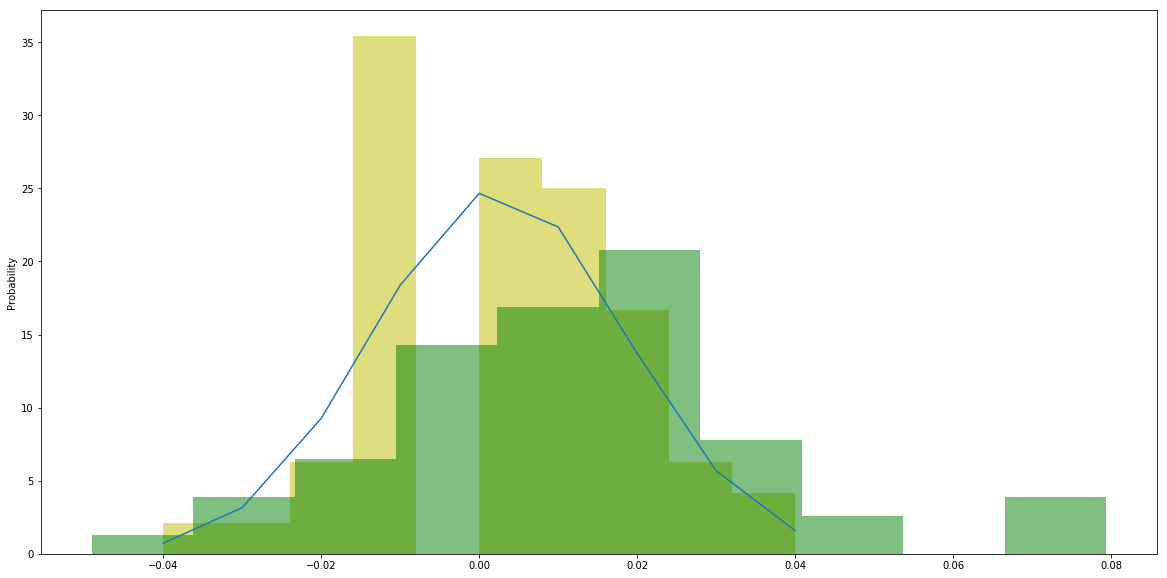

KKP


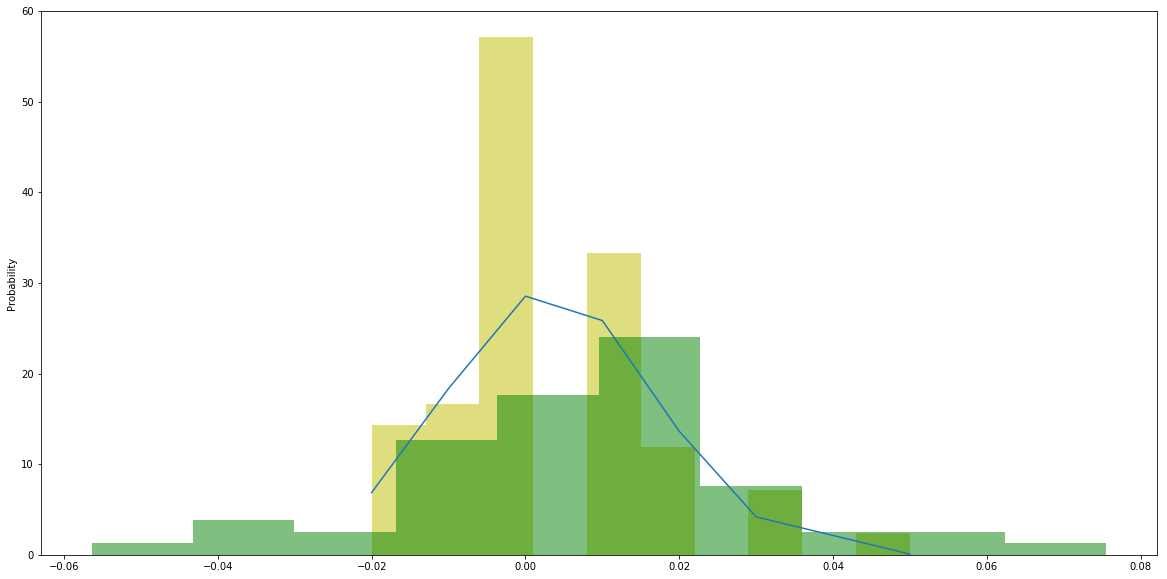

KTB


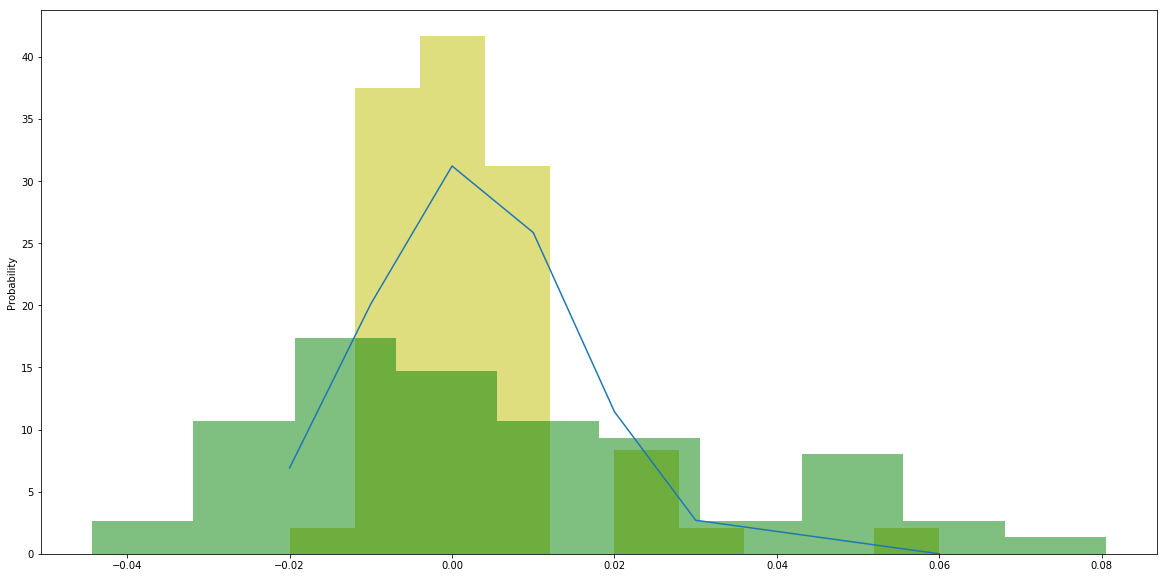

LH


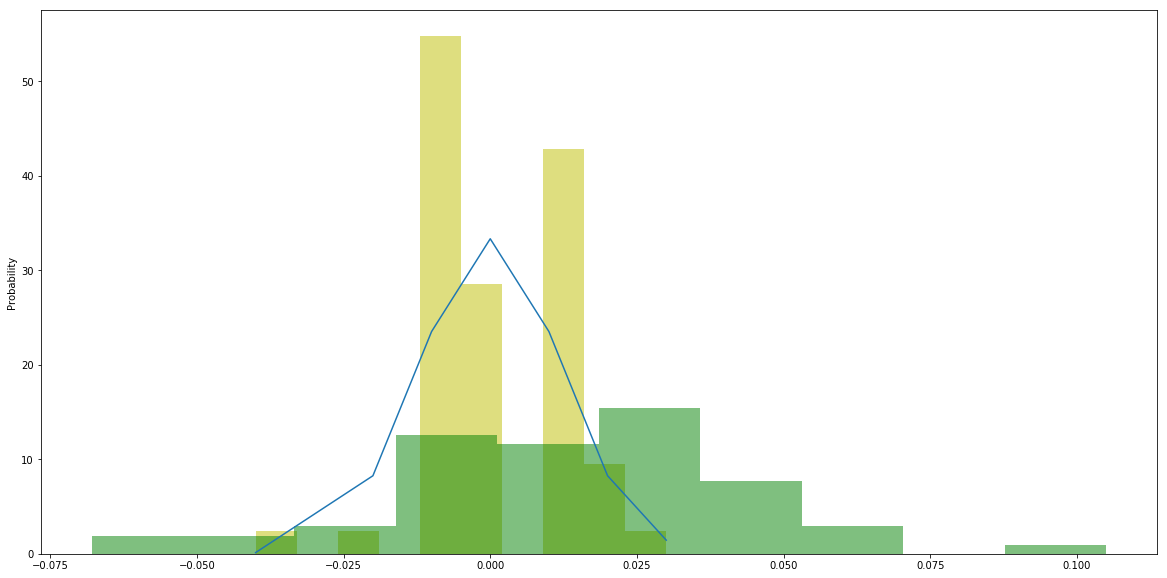

MINT


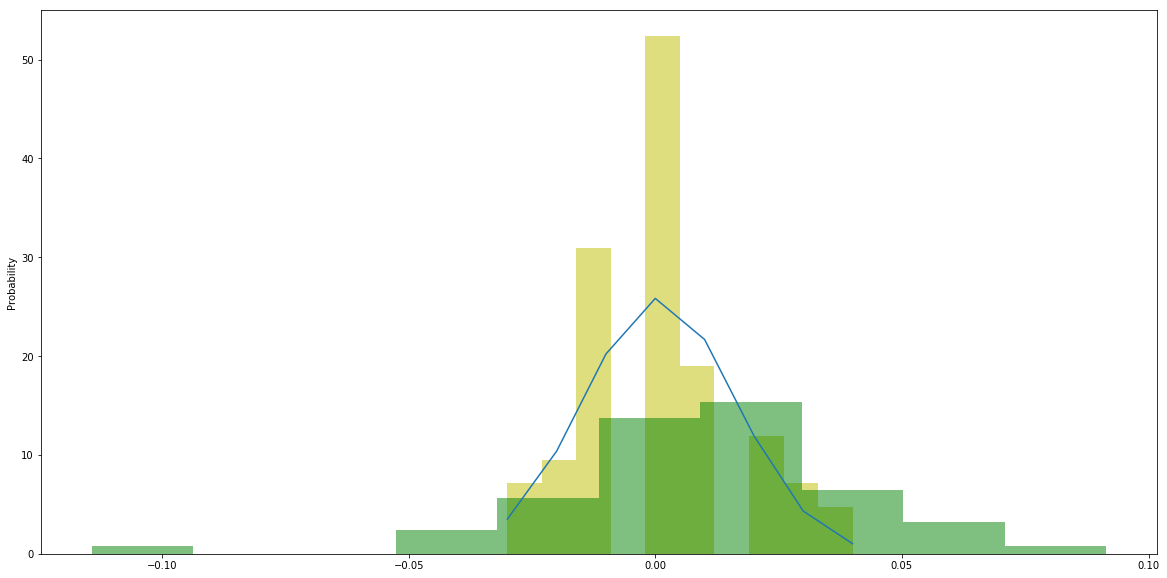

PTT


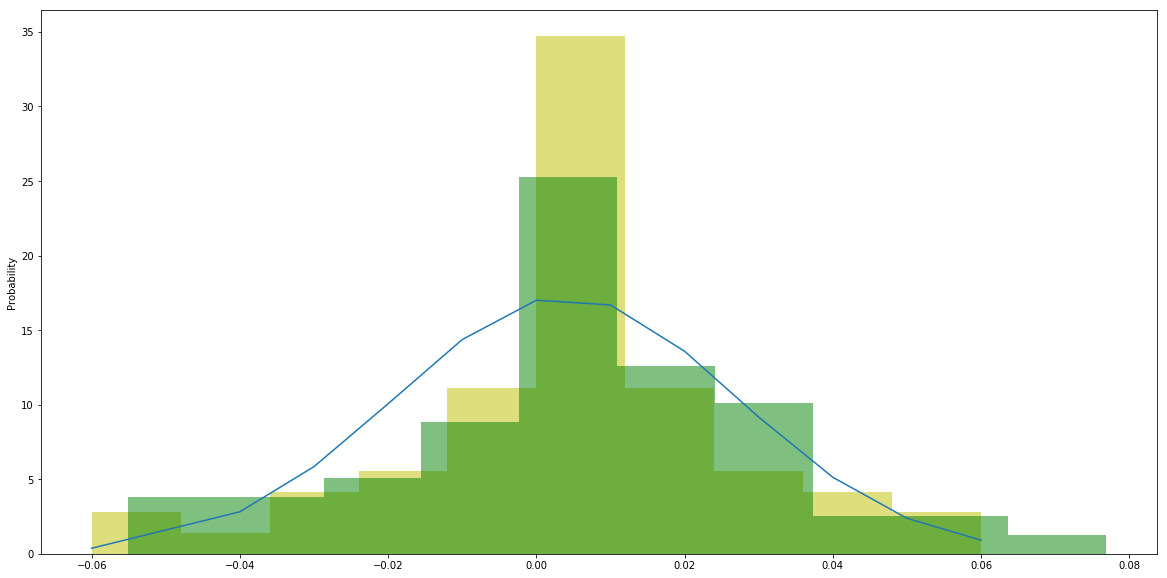

PTTEP


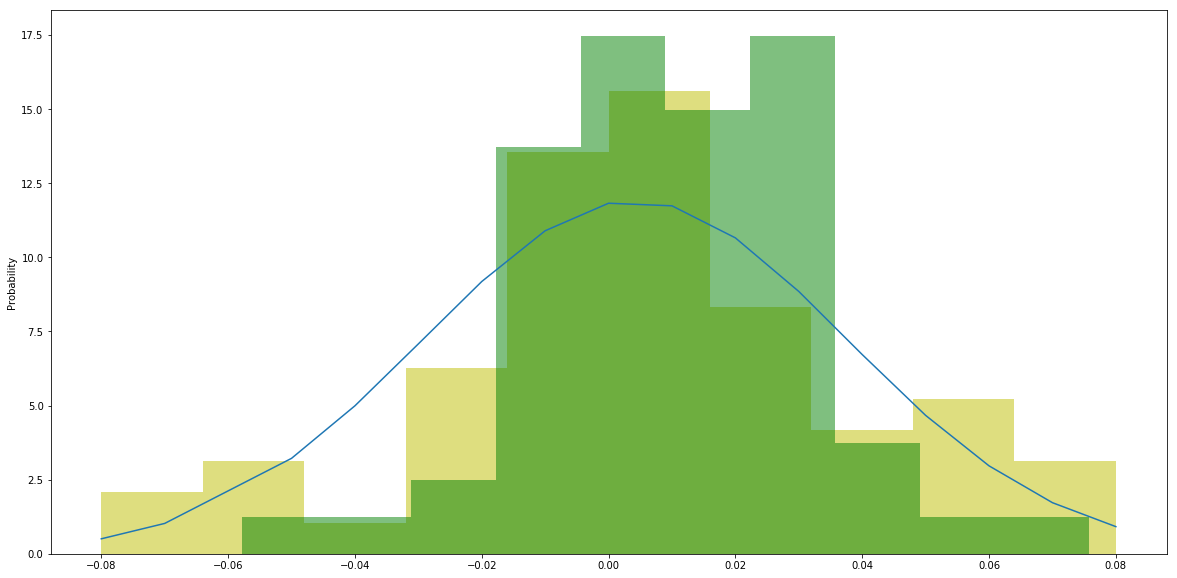

ROBINS


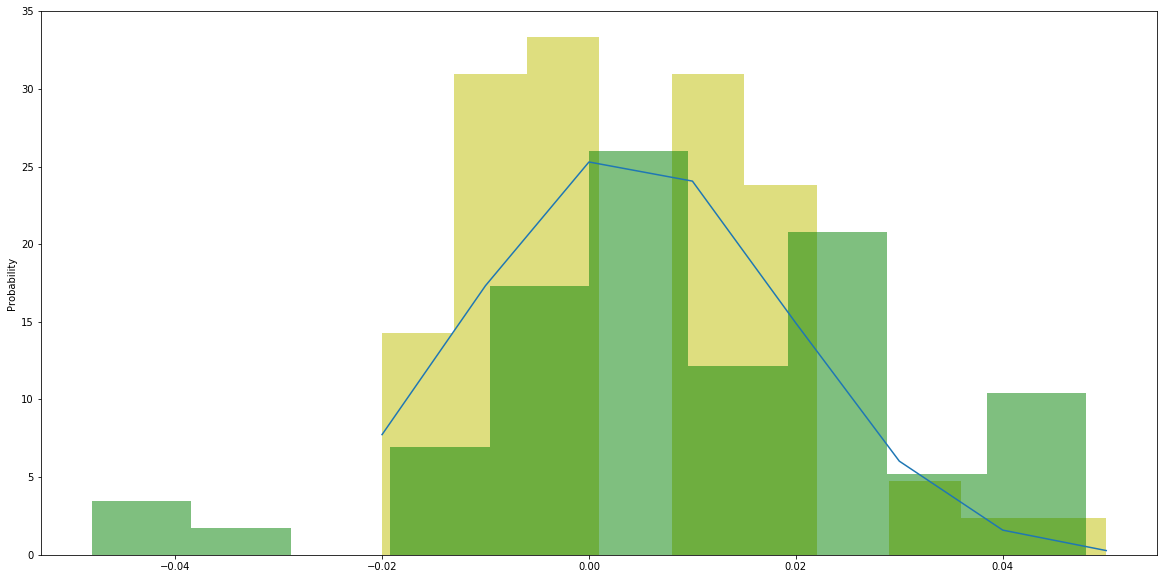

SCB


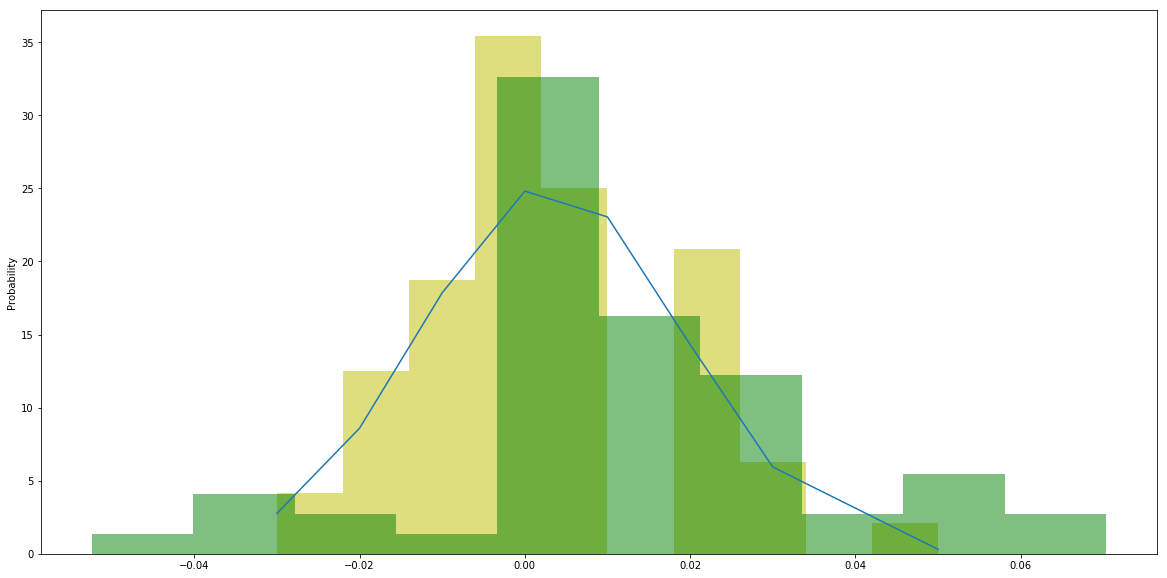

SCC


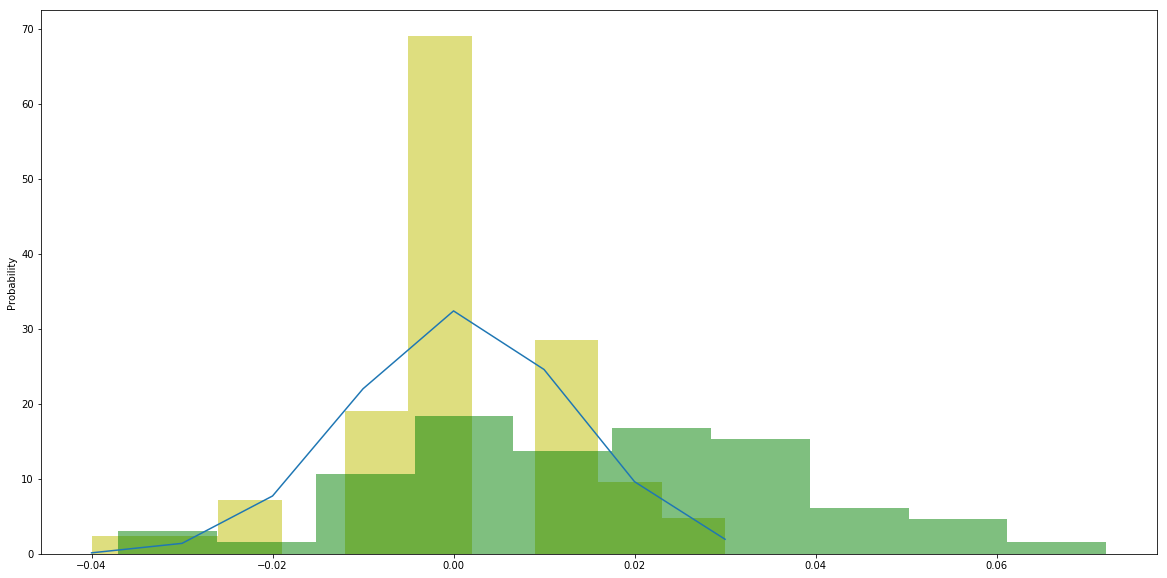

TCAP


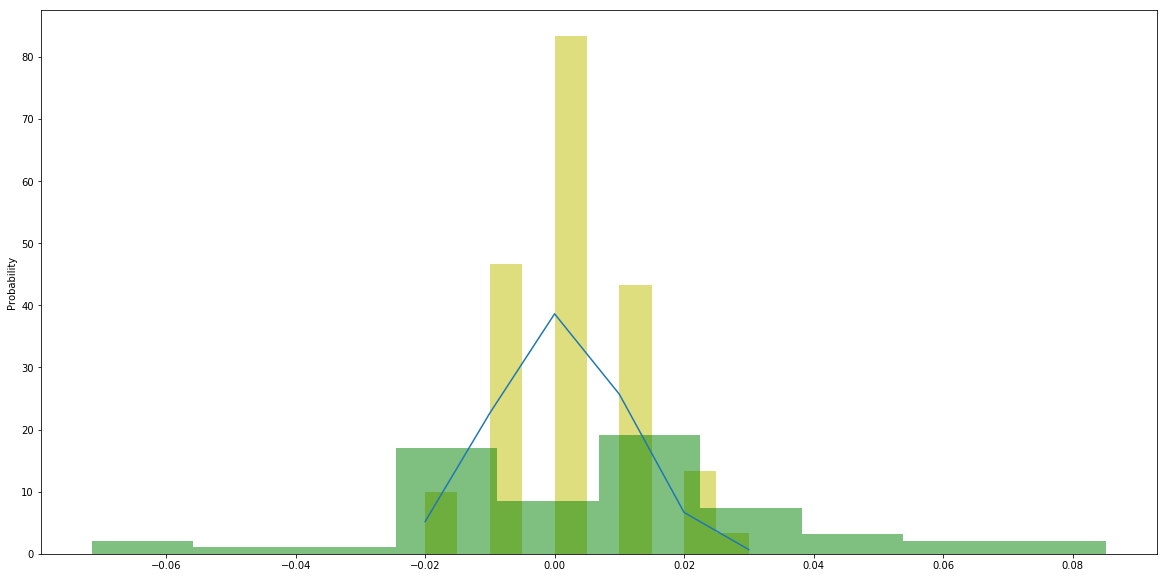

TISCO


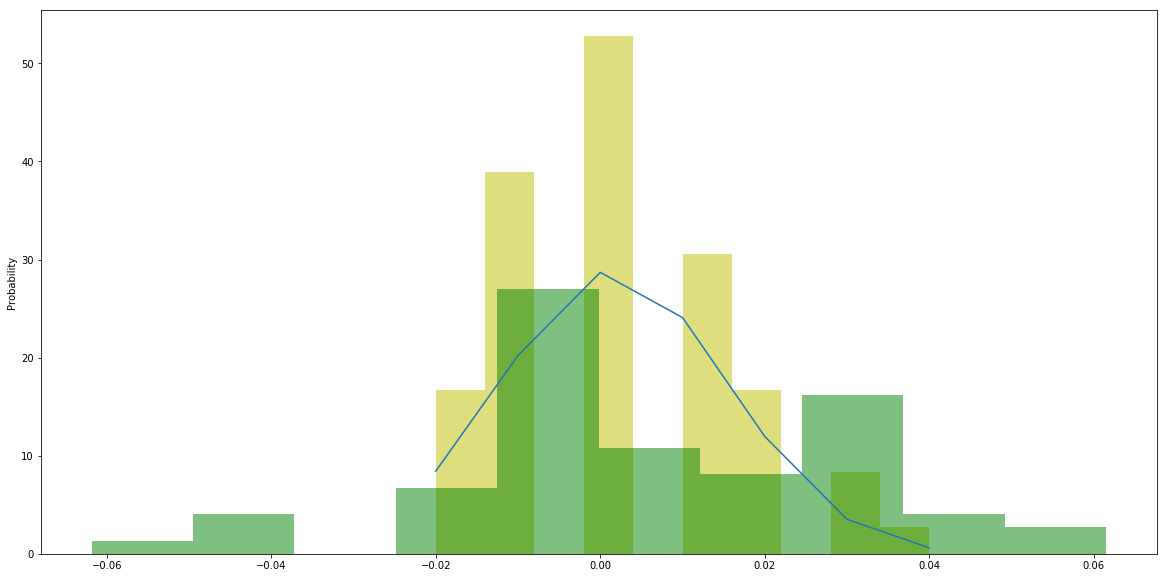

TMB


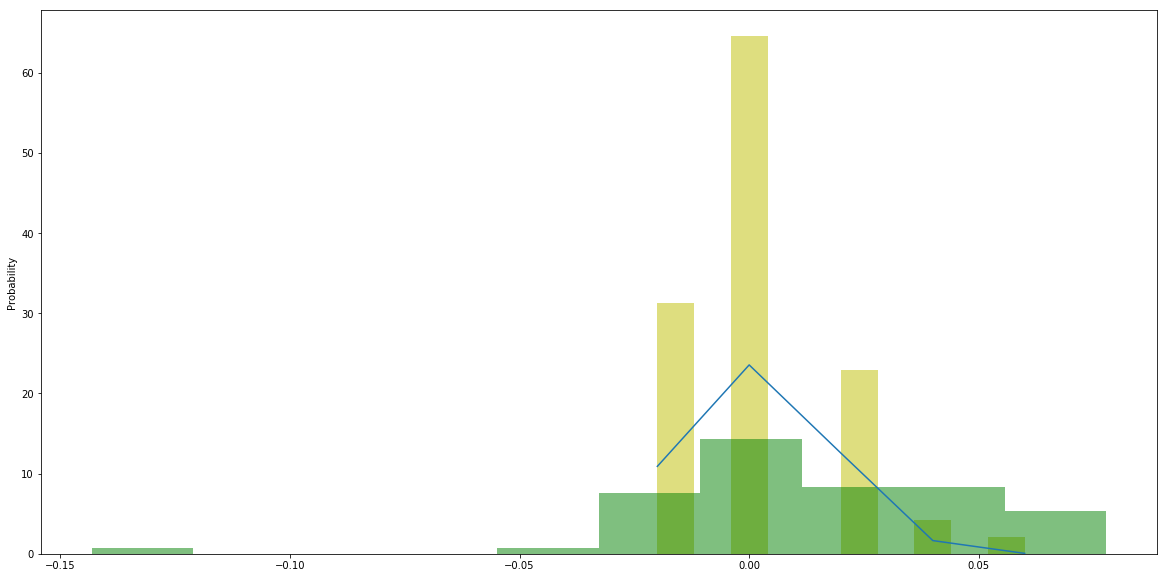

TOP


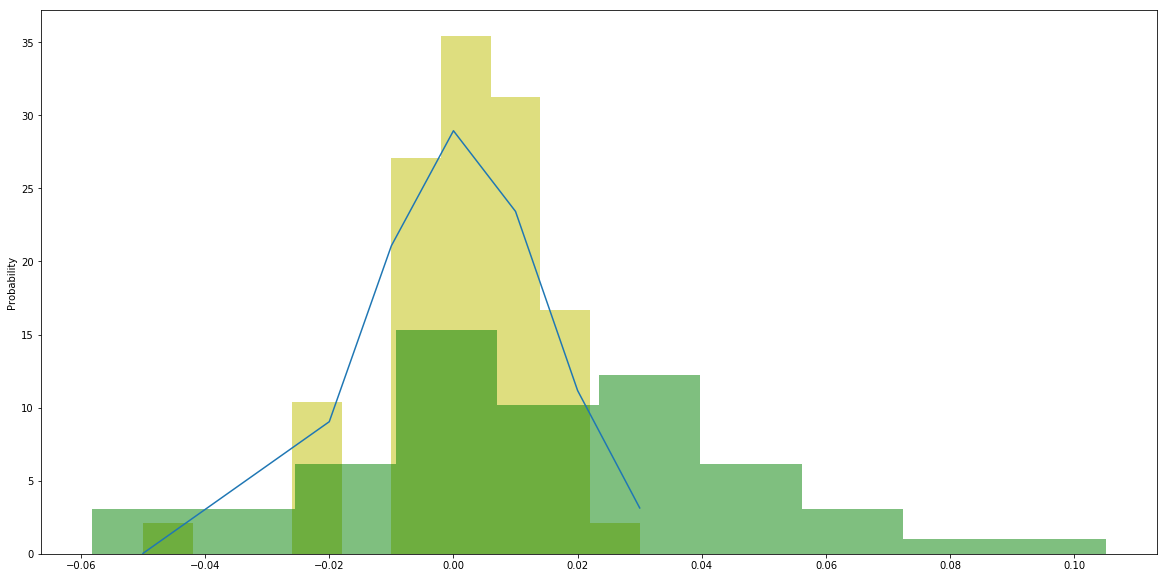

TRUE


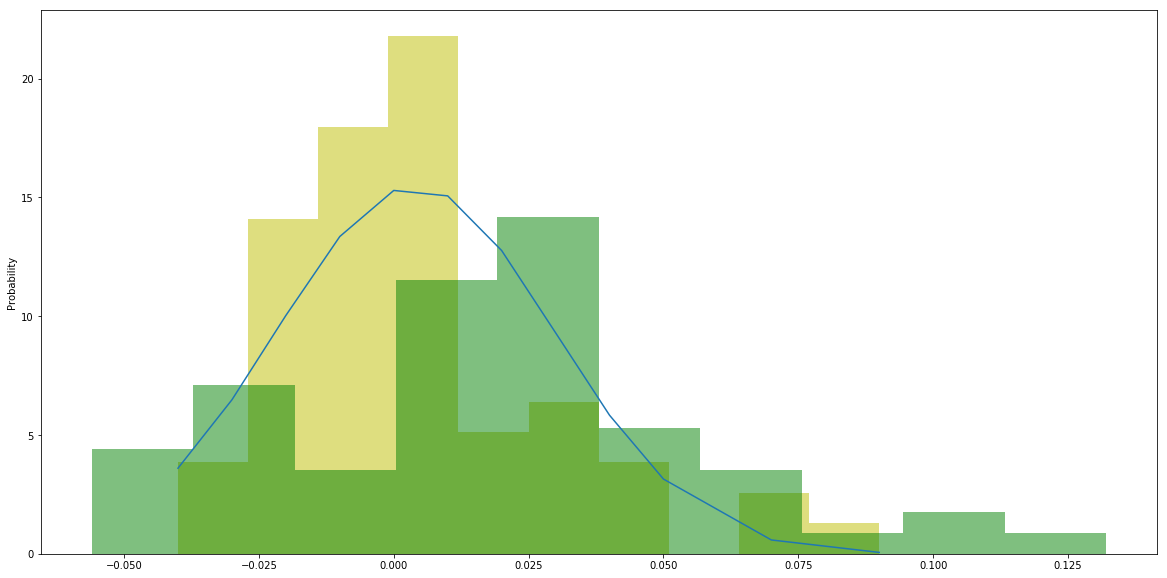

TU


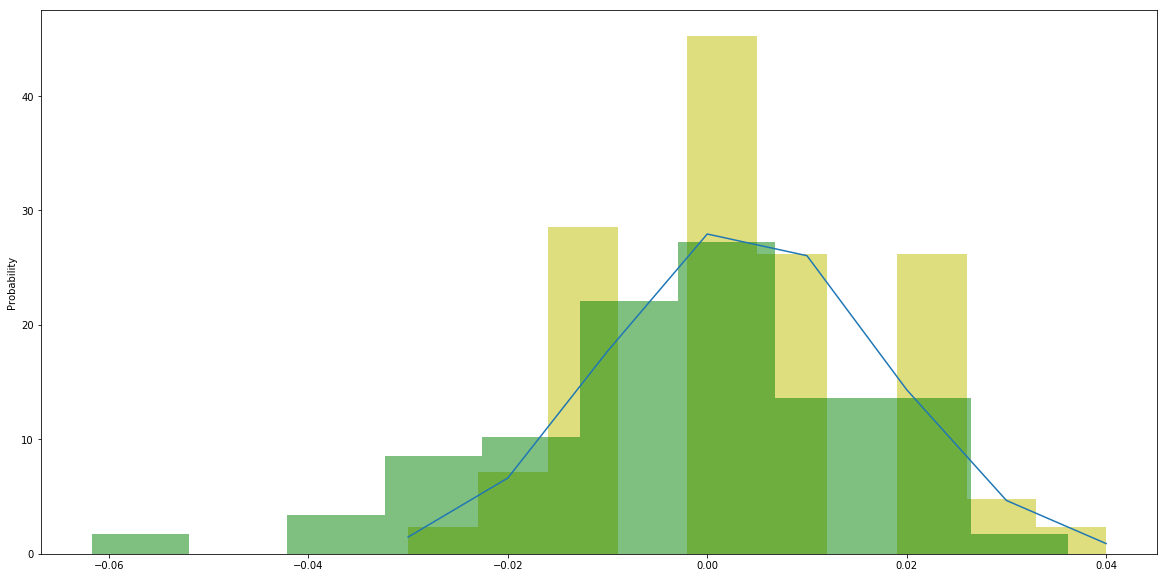

In [52]:
for i in range(len(SET50)):
    print(SET50[i])
    actual = get_data_from_nparray(y_test, i)[0:60]
    actual.sort()
    hmean = np.mean(actual)
    hstd = np.std(actual)
    pdf = stats.norm.pdf(actual, hmean, hstd)
    plt.figure(figsize=(20,10))
    plt.plot(actual, pdf)
    plt.hist(actual, alpha=0.5, normed=True, color='y')
    plt.hist(get_data_from_nparray(predicts, i)[0:60], alpha=0.5, normed=True, color='g')
    plt.ylabel('Probability')
    plt.show()